<div style="background-color:skyblue;">
    </p>
    <p style="color:DarkTurquoise;font-size:1px"> |
    </p>
    <h1 style="color:White;font-family:'Arial';font-size:30px"><center><ins>Self-Driving Car Engineer</ins>
    </center></h1>
    </p>
    <p style="color:DarkTurquoise;font-size:1px"> |
    </p>
    <p style="text-align:left;font-family:'Courier New';color:FloralWhite;font-size:16px"> | Self-Driving Car Engineer Nanodegree, Udacity
        <span style="float:right;font-family:'Courier New';color:White;font-size:16px">
            vamshi.krishna.prime@gmail.com |
        </span>
    </p>
    <p style="color:DarkTurquoise;font-size:1px"> |
    </p>
</div>

<figure>
     <img src="images/image3.png" width="1040" alt="Combined Image" />
     <figcaption>
     <p></p>
     </figcaption>
</figure>

## Project: `Finding Lane Lines on the Road`

---

<figure>
     <img src="images/image5.jpg" width="1040" alt="Combined Image" />
     <figcaption>
     <p></p>
     </figcaption>
</figure>

---

### Table of contents:

1.[**Introduction**](#1.-Introduction) 
  + 1.1. [Orientation:](#1.1-Orientation:)
  + 1.2. [Desired outcome:](#1.2-Desired-outcome:)
  + 1.3. [Software requirements:](#1.3-Software-requirements:)
  + 1.4. [Key modules](#1.4-Key-modules-in-Lane-Detection-Pipeline:)


2.[**Detect Lane Lines**](#2.-Detect-Lane-Lines) 

  + 2.1. [Detect Lane Lines on images](#2.1-Detect-Lane-Lines-on-images)
  
    + 2.1.1. [Display the images in the test directory](#2.1.1.-Display-the-images-in-the-test-directory)
    + 2.1.2. [Convert the images to grayscale (single channel)](#2.1.2.-Convert-the-images-to-grayscale-(single-channel))
    + 2.1.3. [Blur the grayscale image](#2.1.3.-Blur-the-grayscale-image)
    + 2.1.4. [Extract the edges in the image](#2.1.4.-Extract-the-edges-in-the-image)
    + 2.1.5. [Identify the region of interest](#2.1.5.-Identify-the-region-of-interest)
    + 2.1.6. [Mask the excess region](#2.1.6.-Mask-the-excess-region)
    + 2.1.7. [Draw Hough lines from the edges in the masked region](#2.1.7.-Draw-Hough-lines-from-the-edges-in-the-masked-region)
    + 2.1.8. [Superimpose the lines on the image to identify lane markings](#2.1.8.-Superimpose-the-lines-on-the-image-to-identify-lane-markings)
    
  + 2.2. [Detect Lane Lines in video stream](#2.2-Detect-Lane-Lines-in-video-stream)
    + 2.2.1. [Detect Lane Lines in solidWhiteRight video](#2.2.1.-Detect-Lane-Lines-in-solidWhiteRight-video)
    + 2.2.2. [Detect Lane Lines in solidYellowLeft video](#2.2.2.-Detect-Lane-Lines-in-solidYellowLeft-video)
    + 2.2.3. [Detect Lane Lines in challenge video](#2.2.3.-Detect-Lane-Lines-in-challenge-video)
    
3.[**Extrapolated Lane Line Detection**](#3.-Extrapolated-Lane-Line-Detection) 

  + 3.1. [Extrapolated Lane Line Detection on images](#3.1-Extrapolated-Lane-Line-Detection-on-images)
  
    + 3.1.1. [Display the images in the test images challenge directory](#3.1.1.-Display-the-images-in-the-test-images-challenge-directory)
    + 3.1.2. [Convert the images to grayscale (single channel)](#3.1.2.-Convert-the-images-to-grayscale-(single-channel))
    + 3.1.3. [Blur the grayscale image](#3.1.3-Blur-the-grayscale-image)
    + 3.1.4. [Extract the edges in the image](#3.1.4.-Extract-the-edges-in-the-image)
    + 3.1.5. [Identify the region of interest](#3.1.5.-Identify-the-region-of-interest)
    + 3.1.6. [Mask the excess region in the images](#3.1.6.-Mask-the-excess-region-in-the-images)
    + 3.1.7. [Draw Hough lines from the edges in the masked region](#3.1.7.-Draw-Hough-lines-from-the-edges-in-the-masked-region)
    + 3.1.8. [Superimpose the lines on the image to identify lane markings](#3.1.8.-Superimpose-the-lines-on-the-image-to-identify-lane-markings)
    + 3.1.9. [Filter the redundant lines in the images](#3.1.9.-Filter-the-redundant-lines-in-the-images)
    + 3.1.10. [Extrapoate lines with linear regression](#3.1.10.-Extrapoate-lines-with-linear-regression)
    + 3.1.11. [Extrapoate lines on test images set](#3.1.11.-Extrapoate-lines-on-test-images-set)
    + 3.1.12. [Linear Regression](#3.1.12-Linear-Regression)
    
  + 3.2. [Extrapolated Lane Line Detection in video stream](#3.2-Extrapolated-Lane-Line-Detection-on-videos)
  
    + 3.2.1. [Detect extrapolated Lane Lines in solidWhiteRight video](#3.2.1.-Detect-extrapolated-Lane-Lines-in-solidWhiteRight-video)
    + 3.2.2. [Detect extrapolated Lane Lines in solidYellowLeft video](#3.2.2.-Detect-extrapolated-Lane-Lines-in-solidYellowLeft-video)
    + 3.2.3. [Detect extrapolated Lane Lines in challenge video](#3.2.3.-Detect-extrapolated-Lane-Lines-in-challenge-video)
  
4.[**Stabilize the Extrapolated Lane Line Detection**](#4.-Stabilize-the-Extrapolated-Lane-Line-Detection)

  + 4.1.1. [Stabilize the extrapolated Lane Lines in solidWhiteRight video](#4.1.1.-Stabilize-the-extrapolated-Lane-Lines-in-solidWhiteRight-video)
  + 4.1.2. [Stabilize extrapolated Lane Lines in solidYellowLeft video](#4.1.2.-Stabilize-extrapolated-Lane-Lines-in-solidYellowLeft-video)
  + 4.1.3. [Stabilize the extrapolated Lane Lines in challenge video](#4.1.3.-Stabilize-the-extrapolated-Lane-Lines-in-challenge-video)

5.[**Polyfill the Lane Line Detection**](#5.-Polyfill-the-Lane-Line-Detection)

  + 5.1.1. [Fill the space between the Lane Lines in solidWhiteRight video](#5.1.1.-Fill-the-space-between-the-Lane-Lines-in-solidWhiteRight-video)
  + 5.1.2. [Fill the space between the Lane Lines in solidYellowLeft video](#5.1.2.-Fill-the-space-between-the-Lane-Lines-in-solidYellowLeft-video)
  + 5.1.3. [Fill the space between the Lane Lines in challenge video](#5.1.3.-Fill-the-space-between-the-Lane-Lines-in-challenge-video)
 
6.[**Web Application**](#6.-Web-Application:)

7.[**Credentials**](#7.-Credentials:)

  + 7.1. [Udacity Platform](#7.1-Udacity-Platform:)
  + 7.2. [Instructors](#7.2-Instructors:)
  + 7.3. [Contact](#7.3-Contact:)


-----

## 1. `Introduction`

#### 1.1 Orientation:

<p style="text-align:justify">Leveraged various tools to identify lane lines on the road.  Developed the pipeline on a series of individual images, and later applied the result to a video stream of different scenarios/environmental variables.</p>

`Live version of the Web Application`: []()

#### 1.2 Desired outcome:

<p style="text-align:justify">The initial goal of the project is displayed in the video clip "raw-lines-example.mp4" in the directory "examples"(also contained in this repository) to see what the output should look like after using the helper functions in the project. On successful identification of the land lanes, the result that looks roughly like the video clip "raw-lines-example.mp4" in the "examples" directory, improve the output by averaging and/or extrapolating the line segments detected to map out the full extent of the lane lines. You can see an example of the result you're going for, in the video clip "P1_example.mp4" in the "examples" directory.  Ultimately the final output video clip displays just 2 lines; one line for the left side of the lane, and one for the right.</p>

#### 1.3 Software requirements:

<p style="text-align:justify">This project uses `Python 3` version and is designed to be completed through the `Jupyter Notebooks` IDE. It is highly recommended that you use the `Anaconda` distribution to install Python, since the distribution includes all necessary Python libraries as well as Jupyter Notebooks. The following libraries are expected to be used in this project:</p>

+ NumPy
+ pandas
+ Matplotlib
+ Seaborn
+ Streamlit
+ OpenCV 2
+ Moviepy
+ Scikit-learn
+ matplotlib
+ Seaborn
+ Time
+ Math
+ OS
+ HTML
+ Conda
+ Git
+ Jupyter Notebook

**Additional Resources:**

<p style="text-align:justify">In addition to this jupyter notebook, there is a brief writeup in a separate file for reference, which can be either a markdown file or a pdf document.</p>

---

**Note:**

<p style="text-align:justify">In the case of encountering 'frozen display windows' or other confounding issues, always restart with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output". Install all the required software packages and libraries for successful execution of the notebook. Some input parameters in the notebook are selection by experimenting on the output exhibited using the web application developed. Check out the <mark>[Web Application]()</mark> for more explanation.</p>

---

#### 1.4 Key modules in Lane Detection Pipeline:

**Some of the Computer Vision techniques that are used to reach the desired outcome are listed below:**

+ Color selection
+ Region of interest selection
+ Grayscaling
+ Gaussian smoothing
+ Canny Edge Detection
+ Hough Tranform line detection

**Some OpenCV functions that are used in this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images  
`cv2.cvtColor()` to grayscale or change color  
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

Check out the OpenCV documentation to learn about these and discover even more awesome functionality!

<div>
    <p style="text-align:center;font-family:'Courier New';font-size:14px">-------- End of `1. Introduction` --------
    </p>
</div>

----

## 2. `Detect Lane Lines`
=================================

+ 2.1 [Detect Lane Lines on images](#2.1-Detect-Lane-Lines-on-images)
+ 2.2 [Detect Lane Lines in video stream](#2.2-Detect-Lane-Lines-in-video-stream)

### 2.1 <ins>Detect Lane Lines on images</ins>

<p style="text-align:justify">The goal is to piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once we have a working pipeline, then we can move on to work on the video stream.</p>

<table><tr>
<td>
    <figure>
     <img src="test_images/solidWhiteRight.jpg" width="380" alt="Combined Image" />
     <figcaption>
     <p></p> 
     <p style="text-align: center;"> The orginal image used to detect land lines on the road</p> 
     </figcaption>
    </figure>
</td>
<td>
    <p style="font-size:30px;"><b>&#8594;</b></p>
</td>
<td> 
    <figure>
     <img src="examples/line-segments-example.jpg" width="380" alt="Combined Image" />
     <figcaption>
     <p></p> 
     <p style="text-align: center;"> The output detecting line segments using helper functions </p> 
     </figcaption>
    </figure>
</td>
</tr></table>

### Import Packages

In [1]:
# import relevant packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import time
import math
import cv2
%matplotlib inline

### Helper Functions

In [2]:
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    `vertices` should be a numpy array of integer points.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + γ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, γ)

### Read in an Image

This image is: <class 'numpy.ndarray'> , with dimensions: (540, 960, 3)


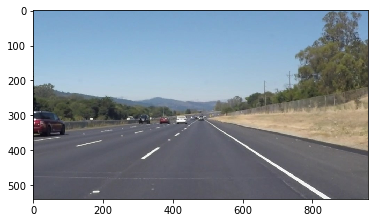

In [3]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')

#printing out some stats and plotting
print('This image is:', type(image), ',', 'with dimensions:', image.shape)
plt.imshow(image);
# for single color channel image called 'gray', call as plt.imshow(gray, cmap='gray')

### Test Images

Build the pipeline to work on the images in the directory "test_images"  
**A test to make sure the pipeline works well on these images before moving on to the videos.**

In [4]:
import os
os.listdir("test_images/")

['solidWhiteCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft.jpg',
 'whiteCarLaneSwitch.jpg']

### 2. Build a Lane Finding Pipeline on Images

<p style="text-align:justify">Build the pipeline and run the solution on all test_images. Tune the various parameters, especially the low and high Canny thresholds as well as the Hough lines parameters. Make copies/output into the `test_images_output` directory, in order to use the images in the writeup report.</p>

#### 2.1.1. Display the images in the test directory

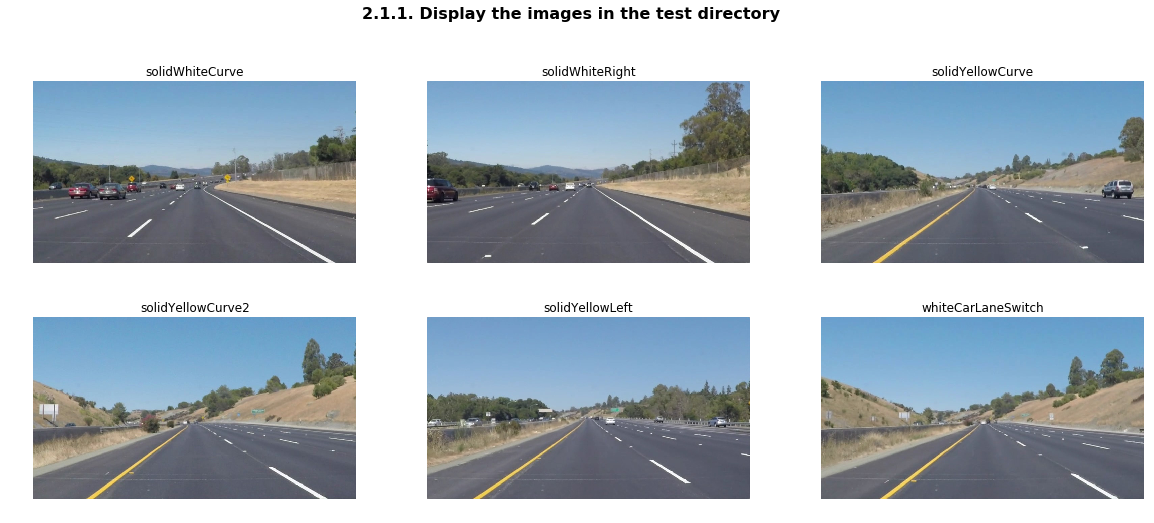

In [5]:
test_images = os.listdir("test_images/")

# initiate figure and subplots
fig = plt.figure(figsize=[20,8])
nrows, ncols = 2, 3

for i, test_image in enumerate(test_images, 1):
    # construct the path to locate the image
    root_directory = "test_images/"
    image_path = test_image
    path = os.path.join(root_directory, image_path)
    
    # read and make a copy of the image
    read_image = mpimg.imread(path)
    image = np.copy(read_image)
    
    # display the image
    ax = fig.add_subplot(nrows, ncols, i)
    ax.imshow(image)
    ax.set_title(test_image.split('.')[0])
    ax.axis('off');

# adjust subplots and add title
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.subplots_adjust(top=0.85)
plt.suptitle('2.1.1. Display the images in the test directory\n', fontsize = 16, weight = 'bold');

# savefig by passing (bbox_inches='tight'),which will adjust the figure to include all of the x and y labels
plt.savefig('test_images_output/2.1.1. Display the images in the test directory.png', dpi=300, bbox_inches='tight')

#### 2.1.2. Convert the images to grayscale (single channel)

<p style="text-align:justify">As all the images in the test directory are colored (RGB channel), convert the images to single channel/grayscale for further computer vision operations.</p>

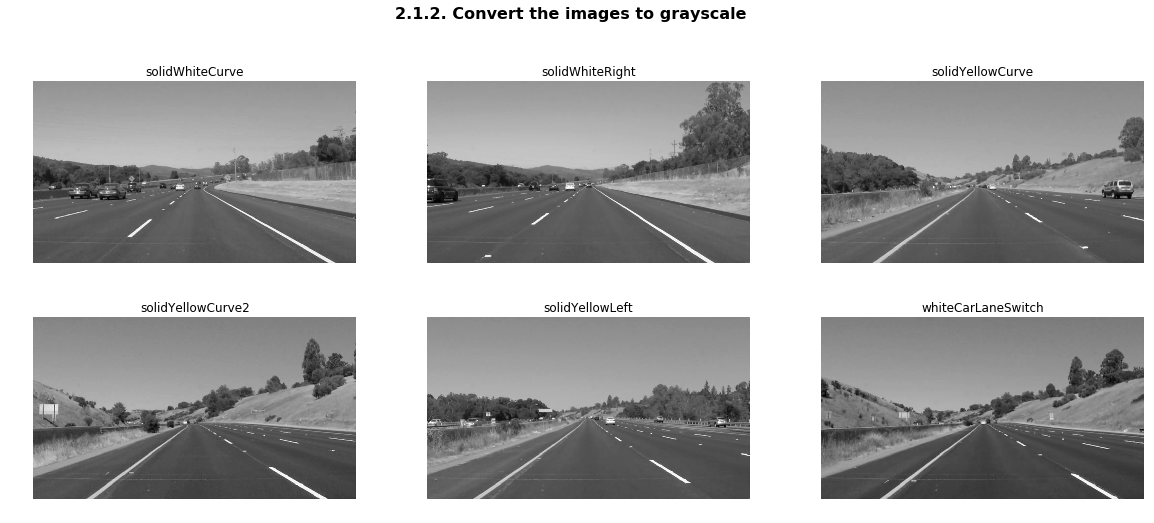

In [6]:
test_images = os.listdir("test_images/")

# initiate figure and subplots
fig = plt.figure(figsize=[20,8])
nrows, ncols = 2, 3

for i, test_image in enumerate(test_images, 1):
    # construct the path to locate the image
    root_directory = "test_images/"
    image_path = test_image
    path = os.path.join(root_directory, image_path)
    
    # read and make a copy of the image
    read_image = mpimg.imread(path)
    image = np.copy(read_image)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # display the image
    ax = fig.add_subplot(nrows, ncols, i)
    ax.imshow(gray, cmap='gray')
    ax.set_title(test_image.split('.')[0])
    ax.axis('off');
    
# adjust subplots and add title
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.subplots_adjust(top=0.85)
plt.suptitle('2.1.2. Convert the images to grayscale\n', fontsize = 16, weight = 'bold');

# savefig by passing (bbox_inches='tight'),which will adjust the figure to include all of the x and y labels
plt.savefig('test_images_output/2.1.2. Convert the images to grayscale.png', dpi=300, bbox_inches='tight')

#### 2.1.3. Blur the grayscale image

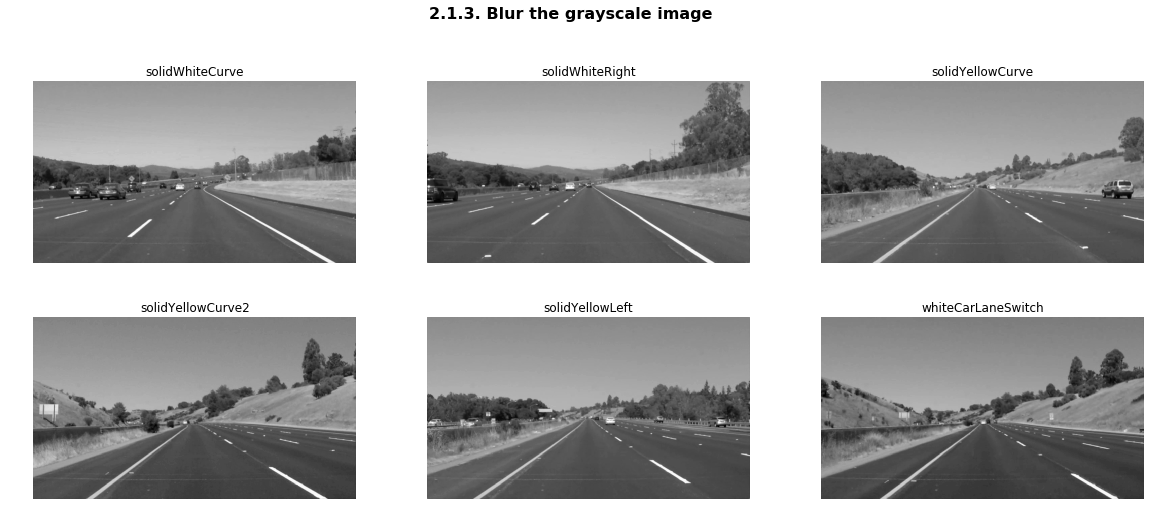

In [7]:
test_images = os.listdir("test_images/")

# initiate figure and subplots
fig = plt.figure(figsize=[20,8])
nrows, ncols = 2, 3

for i, test_image in enumerate(test_images, 1):
    # construct the path to locate the image
    root_directory = "test_images/"
    image_path = test_image
    path = os.path.join(root_directory, image_path)
    
    # read and make a copy of the image
    read_image = mpimg.imread(path)
    image = np.copy(read_image)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Define a kernel size and apply Gaussian smoothing
    kernel_size = 5
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
    
    # display the image
    ax = fig.add_subplot(nrows, ncols, i)
    ax.imshow(blur_gray, cmap='gray')
    ax.set_title(test_image.split('.')[0])
    ax.axis('off');
    
# adjust subplots and add title
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.subplots_adjust(top=0.85)
plt.suptitle('2.1.3. Blur the grayscale image\n', fontsize = 16, weight = 'bold');

# savefig by passing (bbox_inches='tight'),which will adjust the figure to include all of the x and y labels
plt.savefig('test_images_output/2.1.3. Blur the grayscale image.png', dpi=300, bbox_inches='tight')

#### 2.1.4. Extract the edges in the image

<p style="text-align:justify">Extract the edges in the masked region by applying `Canny Edge detection` Computer Vision technique.</p>

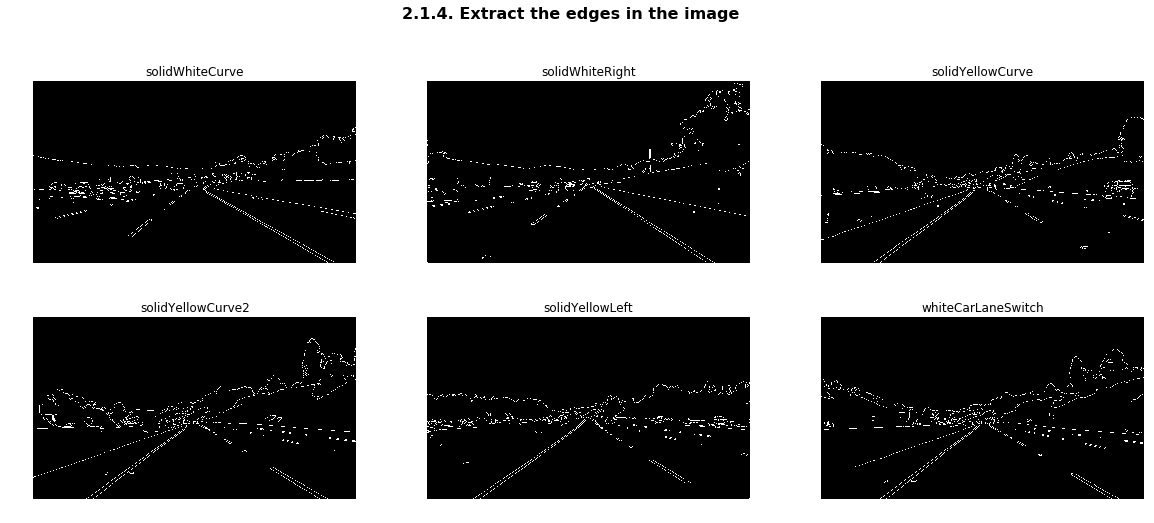

In [8]:
test_images = os.listdir("test_images/")

# initiate figure and subplots
fig = plt.figure(figsize=[20,8])
nrows, ncols = 2, 3

for i, test_image in enumerate(test_images, 1):
    # construct the path to locate the image
    root_directory = "test_images/"
    image_path = test_image
    path = os.path.join(root_directory, image_path)
    
    # read and make a copy of the image
    read_image = mpimg.imread(path)
    image = np.copy(read_image)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Define a kernel size and apply Gaussian smoothing
    kernel_size = 5
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

    # Define our parameters for Canny and apply
    low_threshold = 50
    high_threshold = 150
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
    
    # display the image
    ax = fig.add_subplot(nrows, ncols, i)
    ax.imshow(edges, cmap='gray')
    ax.set_title(test_image.split('.')[0])
    ax.axis('off');
        
# adjust subplots and add title
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.subplots_adjust(top=0.85)
plt.suptitle('2.1.4. Extract the edges in the image\n', fontsize = 16, weight = 'bold');

# savefig by passing (bbox_inches='tight'),which will adjust the figure to include all of the x and y labels
plt.savefig('test_images_output/2.1.4. Extract the edges in the image.png', dpi=300, bbox_inches='tight')

#### 2.1.5. Identify the region of interest

<p style="text-align:justify">Identify the region of interest that is used for further operations. Take consideration of the `hood of the car` and eliminate it from the region of interest.</p>

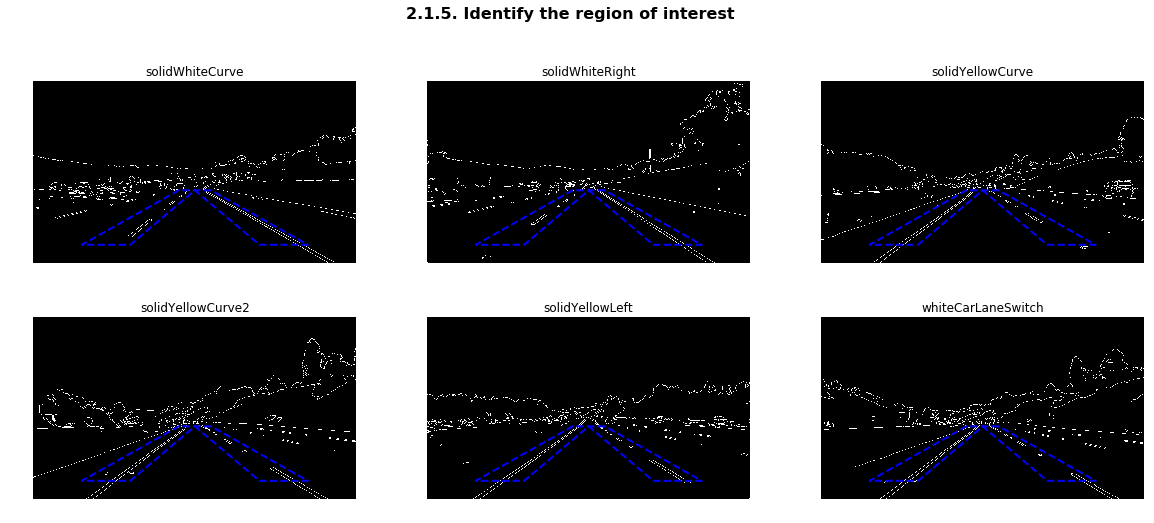

In [9]:
test_images = os.listdir("test_images/")

# initiate figure and subplots
fig = plt.figure(figsize=[20,8])
nrows, ncols = 2, 3

for i, test_image in enumerate(test_images, 1):
    # construct the path to locate the image
    root_directory = "test_images/"
    image_path = test_image
    path = os.path.join(root_directory, image_path)
    
    # read and make a copy of the image
    read_image = mpimg.imread(path)
    image = np.copy(read_image)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Define a kernel size and apply Gaussian smoothing
    kernel_size = 5
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

    # Define our parameters for Canny and apply
    low_threshold = 50
    high_threshold = 150
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
    
    # identify the region of interest
    imshape = image.shape
    x = [.55*imshape[1], .45*imshape[1], .15*imshape[1], .30*imshape[1], 
         .50*imshape[1], .70*imshape[1], .85*imshape[1], .55*imshape[1]]
    y = [.60*imshape[0], .60*imshape[0], .90*imshape[0], .90*imshape[0], 
         .60*imshape[0], .90*imshape[0], .90*imshape[0], .60*imshape[0]]
    
    # display the image
    ax = fig.add_subplot(nrows, ncols, i)
    ax.imshow(edges, cmap='gray')
    ax.set_title(test_image.split('.')[0])
    ax.plot(x, y, 'b--', lw=2)
    ax.axis('off');
            
# adjust subplots and add title
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.subplots_adjust(top=0.85)
plt.suptitle('2.1.5. Identify the region of interest\n', fontsize = 16, weight = 'bold');

# savefig by passing (bbox_inches='tight'),which will adjust the figure to include all of the x and y labels
plt.savefig('test_images_output/2.1.5. Identify the region of interest.png', dpi=300, bbox_inches='tight')

#### 2.1.6. Mask the excess region

<p style="text-align:justify">Keep the region of interest that is used for further operations and remove/darken the rest of the image to ease the identification of the lanes ahead of the vehicle.</p>

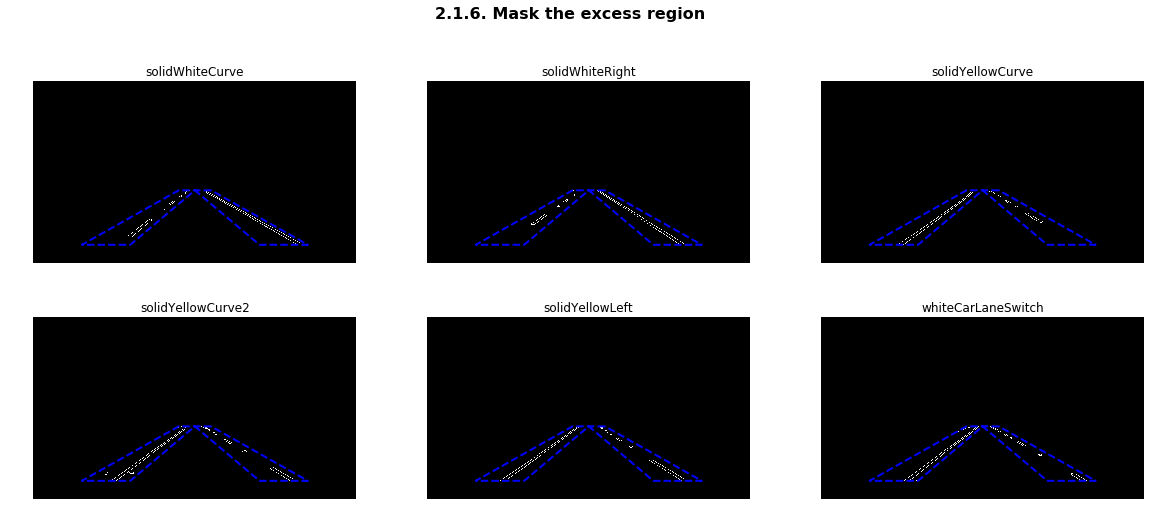

In [10]:
test_images = os.listdir("test_images/")

# initiate figure and subplots
fig = plt.figure(figsize=[20,8])
nrows, ncols = 2, 3

for i, test_image in enumerate(test_images, 1):
    # construct the path to locate the image
    root_directory = "test_images/"
    image_path = test_image
    path = os.path.join(root_directory, image_path)
    
    # read and make a copy of the image
    read_image = mpimg.imread(path)
    image = np.copy(read_image)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Define a kernel size and apply Gaussian smoothing
    kernel_size = 5
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

    # Define our parameters for Canny and apply
    low_threshold = 50
    high_threshold = 150
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
    
    # Next we'll create a masked edges image using cv2.fillPoly()
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255   

    # identify the region of interest
    imshape = image.shape
    x = [.55*imshape[1], .45*imshape[1], .15*imshape[1], .30*imshape[1], 
         .50*imshape[1], .70*imshape[1], .85*imshape[1], .55*imshape[1]]
    y = [.60*imshape[0], .60*imshape[0], .90*imshape[0], .90*imshape[0], 
         .60*imshape[0], .90*imshape[0], .90*imshape[0], .60*imshape[0]]
    
    # This time we are defining a four sided polygon to mask
    imshape = image.shape
    vertices = np.array([[(.55*imshape[1], .60*imshape[0]), 
                          (.45*imshape[1], .60*imshape[0]),  
                          (.15*imshape[1], .90*imshape[0]), 
                          (.30*imshape[1], .90*imshape[0]), 
                          (.50*imshape[1], .60*imshape[0]),
                          (.70*imshape[1], .90*imshape[0]),
                          (.85*imshape[1], .90*imshape[0]),
                          (.55*imshape[1], .60*imshape[0])]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    edges_masked = cv2.bitwise_and(edges, mask)

    # display the image
    ax = fig.add_subplot(nrows, ncols, i)
    ax.imshow(edges_masked, cmap='gray')
    ax.set_title(test_image.split('.')[0])
    ax.plot(x, y, 'b--', lw=2)
    ax.axis('off');
            
# adjust subplots and add title
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.subplots_adjust(top=0.85)
plt.suptitle('2.1.6. Mask the excess region\n', fontsize = 16, weight = 'bold');

# savefig by passing (bbox_inches='tight'),which will adjust the figure to include all of the x and y labels
plt.savefig('test_images_output/2.1.6. Mask the excess region.png', dpi=300, bbox_inches='tight')

#### 2.1.7. Draw Hough lines from the edges in the masked region

<p style="text-align:justify">Use Hough Line transformation to identify lines from the edges and draw the lines using various input parameters.</p>

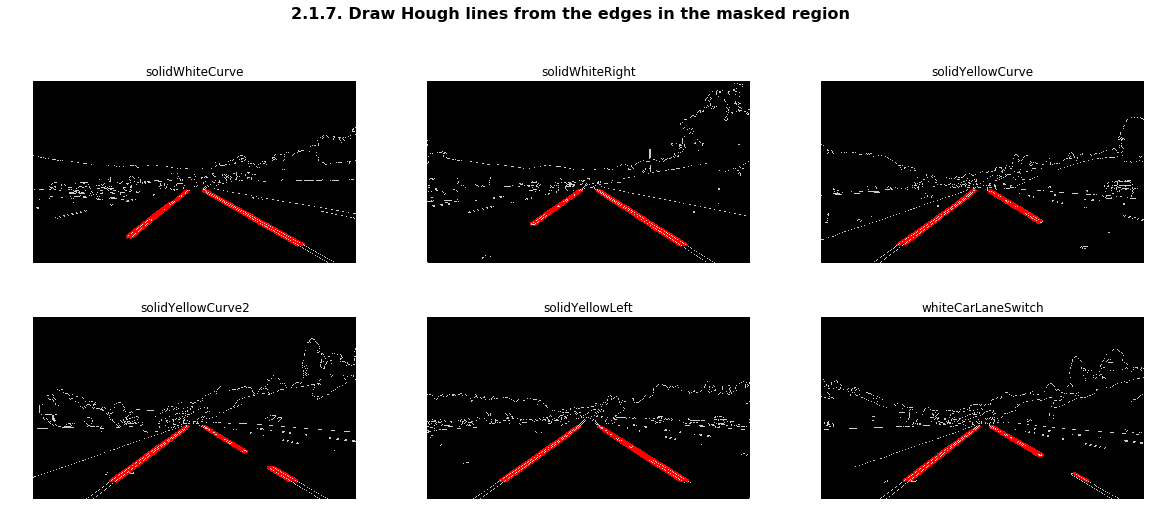

In [11]:
test_images = os.listdir("test_images/")

# initiate figure and subplots
fig = plt.figure(figsize=[20,8])
nrows, ncols = 2, 3

for i, test_image in enumerate(test_images, 1):
    # construct the path to locate the image
    root_directory = "test_images/"
    image_path = test_image
    path = os.path.join(root_directory, image_path)
    
    # read and make a copy of the image
    read_image = mpimg.imread(path)
    image = np.copy(read_image)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Define a kernel size and apply Gaussian smoothing
    kernel_size = 5
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

    # Define our parameters for Canny and apply
    low_threshold = 50
    high_threshold = 150
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
    
    # Next we'll create a masked edges image using cv2.fillPoly()
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255   

    # This time we are defining a four sided polygon to mask
    imshape = image.shape
    vertices = np.array([[(.55*imshape[1], .60*imshape[0]), 
                          (.45*imshape[1], .60*imshape[0]),  
                          (.15*imshape[1], .90*imshape[0]), 
                          (.30*imshape[1], .90*imshape[0]), 
                          (.50*imshape[1], .60*imshape[0]),
                          (.70*imshape[1], .90*imshape[0]),
                          (.85*imshape[1], .90*imshape[0]),
                          (.55*imshape[1], .60*imshape[0])]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    edges_masked = cv2.bitwise_and(edges, mask)
    
    # Define the Hough transform parameters
    # Make a blank the same size as our image to draw on
    rho = 1 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 40    # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 10 #minimum number of pixels making up a line
    max_line_gap = 70    # maximum gap in pixels between connectable line segments
    line_image = np.copy(image)*0 # creating a blank to draw lines on

    # Run Hough on edge detected image
    # Output "lines" is an array containing endpoints of detected line segments
    lines = cv2.HoughLinesP(edges_masked, rho, theta, threshold, np.array([]),
                                min_line_length, max_line_gap)
    
    # Iterate over the output "lines" and draw lines on a blank image
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

    # Create a "color" binary image to combine with line image
    color_edges = np.dstack((edges, edges, edges)) 

    # Draw the lines on the edge image
    lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)
    
    # display the image
    ax = fig.add_subplot(nrows, ncols, i)
    ax.imshow(lines_edges, cmap='gray')
    ax.set_title(test_image.split('.')[0])
    ax.axis('off');
                
# adjust subplots and add title
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.subplots_adjust(top=0.85)
plt.suptitle('2.1.7. Draw Hough lines from the edges in the masked region\n', fontsize = 16, weight = 'bold');

# savefig by passing (bbox_inches='tight'),which will adjust the figure to include all of the x and y labels
plt.savefig('test_images_output/2.1.7. Draw Hough lines from the edges in the masked region.png', dpi=300, bbox_inches='tight')

#### 2.1.8. Superimpose the lines on the image to identify lane markings

<p style="text-align:justify">Superimpose the extracted lines on the original image to potray the identification of lane markings in the image.</p>

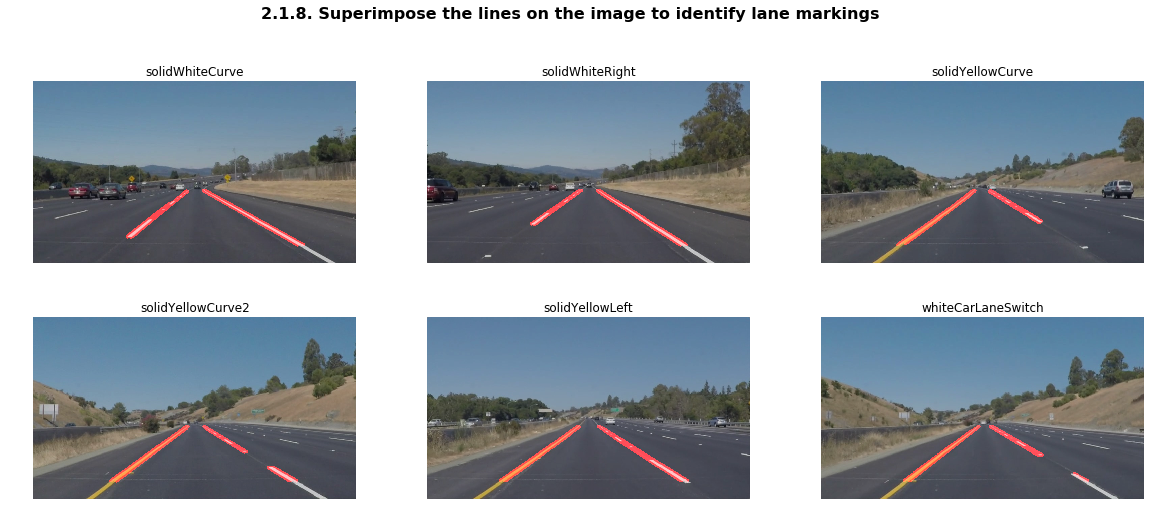

In [12]:
test_images = os.listdir("test_images/")

# initiate figure and subplots
fig = plt.figure(figsize=[20,8])
nrows, ncols = 2, 3

for i, test_image in enumerate(test_images, 1):
    # construct the path to locate the image
    root_directory = "test_images/"
    image_path = test_image
    path = os.path.join(root_directory, image_path)
    
    # read and make a copy of the image
    read_image = mpimg.imread(path)
    image = np.copy(read_image)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Define a kernel size and apply Gaussian smoothing
    kernel_size = 5
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

    # Define our parameters for Canny and apply
    low_threshold = 50
    high_threshold = 150
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
    
    # Next we'll create a masked edges image using cv2.fillPoly()
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255   

    # This time we are defining a four sided polygon to mask
    imshape = image.shape
    vertices = np.array([[(.55*imshape[1], .60*imshape[0]), 
                          (.45*imshape[1], .60*imshape[0]),  
                          (.15*imshape[1], .90*imshape[0]), 
                          (.30*imshape[1], .90*imshape[0]), 
                          (.50*imshape[1], .60*imshape[0]),
                          (.70*imshape[1], .90*imshape[0]),
                          (.85*imshape[1], .90*imshape[0]),
                          (.55*imshape[1], .60*imshape[0])]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    edges_masked = cv2.bitwise_and(edges, mask)
    
    # Define the Hough transform parameters
    # Make a blank the same size as our image to draw on
    rho = 1 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 40    # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 10 #minimum number of pixels making up a line
    max_line_gap = 70    # maximum gap in pixels between connectable line segments
    line_image = np.copy(image)*0 # creating a blank to draw lines on

    # Run Hough on edge detected image
    # Output "lines" is an array containing endpoints of detected line segments
    lines = cv2.HoughLinesP(edges_masked, rho, theta, threshold, np.array([]),
                                min_line_length, max_line_gap)
    
    # Iterate over the output "lines" and draw lines on a blank image
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

    # Create a "color" binary image to combine with line image
    color_edges = np.dstack((edges, edges, edges)) 

    # Draw the lines on the edge image
    lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)
    
    # Draw the lines on the copy of the origical image
    image_lines = cv2.addWeighted(image, 0.8, line_image, 1, 0)
    
    # display the image
    ax = fig.add_subplot(nrows, ncols, i)
    ax.imshow(image_lines, cmap='gray')
    ax.set_title(test_image.split('.')[0])
    ax.axis('off');

# adjust subplots and add title
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.subplots_adjust(top=0.85)
plt.suptitle('2.1.8. Superimpose the lines on the image to identify lane markings\n', fontsize = 16, weight = 'bold');

# savefig by passing (bbox_inches='tight'),which will adjust the figure to include all of the x and y labels
plt.savefig('test_images_output/2.1.8. Superimpose the lines on the image to identify \
            lane markings.png', dpi=300, bbox_inches='tight')

<div>
    <p style="text-align:center;font-family:'Courier New';font-size:14px">-------- End of `2.1. Detect Lane Lines on images` --------
    </p>
</div>

--------

### 2.2 <ins>Detect Lane Lines in video stream</ins>

#### Import libraries to work on video streams

In [13]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

You know what's cooler than drawing lanes over images? Drawing lanes over video!

>We can test our solution on two provided videos and one optional challenge video:
+ `solidWhiteRight.mp4`, `solidYellowLeft.mp4`, and `challenge.mp4`

**Note: if you get an import error when you run the next cell, try changing your kernel (select the Kernel menu above --> Change Kernel). Still have problems? Try relaunching Jupyter Notebook from the terminal prompt. Also, consult the forums for more troubleshooting tips.**

**If you get an error that looks like this:**
>```
NeedDownloadError: Need ffmpeg exe. 
You can download it by calling: 
imageio.plugins.ffmpeg.download()
```

**Follow the instructions in the error message and check out [this forum post](https://discussions.udacity.com/t/project-error-of-test-on-videos/274082) for more troubleshooting tips across operating systems.**

In [14]:
HTML("""
<video width="480" height="270" controls>
  <source src="{0}">
</video>
""".format("examples/raw-lines-example.mp4"))

#### Pipeline

In [5]:
def process_image(read_image):
    '''NOTE: The output you return should be a color image (3 channel) for processing video below'''
    
    # read and make a copy of the image
    image = np.copy(read_image)
    
    # convert the image to grayscale
    gray_image = grayscale(image)
    
    # Define a kernel size and apply Gaussian smoothing
    blur_gray = gaussian_blur(gray_image, kernel_size = 5)

    # Define our parameters for Canny and apply
    edges = canny(blur_gray, low_threshold = 50, high_threshold = 150)
    
    # maske the region of interest
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255   

    # This time we are defining a four sided polygon to mask
    imshape = image.shape
    vertices = np.array([[(.55*imshape[1], .60*imshape[0]), 
                          (.45*imshape[1], .60*imshape[0]),  
                          (.15*imshape[1], .90*imshape[0]), 
                          (.30*imshape[1], .90*imshape[0]), 
                          (.50*imshape[1], .60*imshape[0]),
                          (.70*imshape[1], .90*imshape[0]),
                          (.85*imshape[1], .90*imshape[0]),
                          (.55*imshape[1], .60*imshape[0])]], dtype=np.int32)
    
    masked_edges = region_of_interest(edges, vertices)
    
    # draw lines using hough transform
    line_image = hough_lines(masked_edges, rho = 1, theta = np.pi/180, 
                             threshold = 40, min_line_len = 10, max_line_gap = 70)
    
    # perform weighted addition of line_image and original image to potray lane markings
    image_lanes = weighted_img(line_image, image, α=1.0, β=1.0, γ=0.)
    result = image_lanes
    
    # return the final image where lines are drawn on lanes
    return result

#### 2.2.1. Detect Lane Lines in `solidWhiteRight` video

In [16]:
white_output = 'test_videos_output/1_1_solidWhiteRight_houghlines.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

t:   3%|▊                            | 6/221 [00:00<00:07, 30.10it/s, now=None]

Moviepy - Building video test_videos_output/1_1_solidWhiteRight_houghlines.mp4.
Moviepy - Writing video test_videos_output/1_1_solidWhiteRight_houghlines.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/1_1_solidWhiteRight_houghlines.mp4
Wall time: 7 s


Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [17]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

#### 2.2.2. Detect Lane Lines in `solidYellowLeft` video

In [18]:
yellow_output = 'test_videos_output/2_1_solidYellowLeft_houghlines.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

t:   0%|▏                            | 3/681 [00:00<00:26, 25.64it/s, now=None]

Moviepy - Building video test_videos_output/2_1_solidYellowLeft_houghlines.mp4.
Moviepy - Writing video test_videos_output/2_1_solidYellowLeft_houghlines.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/2_1_solidYellowLeft_houghlines.mp4
Wall time: 20.1 s


In [19]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

#### 2.2.3. Detect Lane Lines in `challenge` video

In [20]:
challenge_output = 'test_videos_output/3_1_challenge_houghlines.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
# clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,4)
clip3 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

t:   1%|▎                            | 3/251 [00:00<00:10, 23.08it/s, now=None]

Moviepy - Building video test_videos_output/3_1_challenge_houghlines.mp4.
Moviepy - Writing video test_videos_output/3_1_challenge_houghlines.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/3_1_challenge_houghlines.mp4
Wall time: 15.5 s


In [21]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))

> <p style="text-align:justify">The above videos depicts that the pipeline is able to identify the lane markings in the `1_1_solidWhiteRight_houghlines` and `2_1_solidYellowLeft_houghlines`, however it does not perform well on the `3_1_challenge_houghlines` video as it contains a lot of nosie in the form of shadows, curves, and lane line fadeouts.</p>

<div>
    <p style="text-align:center;font-family:'Courier New';font-size:14px">-------- End of `2.2. Detect Lane Lines in video stream` --------
    </p>
</div>

-----

## 3. `Extrapolated Lane Line Detection`
===================================================

+ 3.1 [Extrapolated Lane Line Detection on images](#3.1-Extrapolated-Lane-Line-Detection-on-images)
+ 3.2 [Extrapolated Lane Line Detection in video stream](#3.2-Extrapolated-Lane-Line-Detection-on-videos)

**Goal 2: Extrapolated Lane Detection Pipeline**

<p style="text-align:justify">At this point, we are successful with making the pipeline and tuning the parameters, and have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)? Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform. The goal is to improvize the pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).</p>

<table><tr>
<td>
    <figure>
     <img src="examples/line-segments-example.jpg" width="380" alt="Combined Image" />
     <figcaption>
     <p></p> 
     <p style="text-align: center;"> The orginal image used to detect land lines on the road</p> 
     </figcaption>
    </figure>
</td>
<td>
    <p style="font-size:30px;"><b>&#8594;</b></p>
</td>
<td> 
    <figure>
     <img src="examples/laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
     <figcaption>
     <p></p> 
     <p style="text-align: center;"> The output detecting line segments using helper functions </p> 
     </figcaption>
    </figure>
</td>
</tr></table>

### <ins>Helper functions - modified</ins>

In [22]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [24]:
# Initiate global variables
r_x1 = 0
r_x2 = 0
r_x3 = 0
l_x1 = 0
l_x2 = 0
l_x3 = 0


def add_image_line(img, x1, y1, x2, y2, x3, color, thickness):
    imshape = img.shape
    x1 = int(np.round(x1, 0))
    x2 = int(np.round(x2, 0))
    x3 = int(np.round(x3, 0))
    dx_r = int(np.round(x1 + (imshape[1]/100), 0))
    dx_l = int(np.round(x1 - (imshape[1]/100), 0))
    dy = int(np.round(y2 + (imshape[0]/50), 0))
    y1 = int(np.round(y1, 0))
    y2 = int(np.round(y2, 0))
    # draw the lines
    cv2.line(img, (x1, y1), (x2, y2), color, thickness)
    cv2.line(img, (dx_r, y1), (x3, dy), color, thickness)
    cv2.line(img, (dx_l, y1), (x3, dy), color, thickness)


def draw_lines_extrapolated(img, lines, color=[9, 219, 44], thickness=5):
    """
    NOTE:
    This function draws the extrapolated `lines` with `color` and `thickness`.
    Removed redundant lines with extreme slopes.
    Used Linear regression to fit the line from the points on each side of the lane.
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() in the function below.
    """
    
    global r_x1
    global r_x2
    global r_x3
    global l_x1
    global l_x2
    global l_x3
    
    rc = np.array([])
    lc = np.array([])
    rx = np.array([])
    ry = np.array([])
    lx = np.array([])
    ly = np.array([])
    
    imshape = img.shape
    
    for line in lines:
        for x1,y1,x2,y2 in line:
            center = [(x1+x2)/2, (y1+y2)/2]
    
            try:
                slope = (y2-y1)/(x2-x1)
            except ZeroDivisionError:
                slope = np.inf            
            
            if slope > 0.5 and slope < 10 and x1 > (.50*imshape[1]) and x2 > (.50*imshape[1]):
                rc = np.append(rc, center)
                rx = np.append(rx, [x1,x2])
                ry = np.append(ry, [y1,y2])
                
            elif slope < -0.5 and slope > -10 and x1 < (.50*imshape[1]) and x2 < (.50*imshape[1]):
                lc = np.append(lc, center)
                lx = np.append(lx, [x1,x2])
                ly = np.append(ly, [y1,y2])
    

    r_center = np.mean(rc, axis = 0)
    l_center = np.mean(lc, axis = 0)
    y1 = imshape[0]
    y2 = imshape[0]*0.62
    
    if not np.isnan(r_center).all():
        rx = rx.reshape(-1,1)
        reg.fit(rx, ry)
        r_slope, r_intercept = reg.coef_[0], reg.intercept_
        if r_slope > 0.5 and r_slope < 10:
            r_x1 = (y1 - r_intercept) / r_slope
            r_x2 = (y2 - r_intercept) / r_slope
            r_x3 = ((y2 + (imshape[0]/50))- r_intercept) / r_slope
            add_image_line(img, r_x1, y1, r_x2, y2, r_x3, color, thickness)
        else:
            add_image_line(img, r_x1, y1, r_x2, y2, r_x3, color, thickness)
        
    elif np.isnan(r_center).all():
        add_image_line(img, r_x1, y1, r_x2, y2, r_x3, color, thickness)
    
    if not np.isnan(l_center).all():
        lx = lx.reshape(-1,1)
        reg.fit(lx, ly)
        l_slope, l_intercept = reg.coef_[0], reg.intercept_
        if l_slope < -0.5 and l_slope > -10:
            l_x1 = (y1 - l_intercept) / l_slope
            l_x2 = (y2 - l_intercept) / l_slope
            l_x3 = ((y2 + (imshape[0]/50))- l_intercept) / l_slope
            add_image_line(img, l_x1, y1, l_x2, y2, l_x3, color, thickness)
        else:
            add_image_line(img, l_x1, y1, l_x2, y2, l_x3, color, thickness)
    
    elif np.isnan(l_center).all():
        add_image_line(img, l_x1, y1, l_x2, y2, l_x3, color, thickness)


def hough_lines_extrapolated(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), 
                            minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines_extrapolated(line_img, lines)
    return line_img

### 3.1 <ins>Extrapolated Lane Line Detection on images</ins>

#### 3.1.1. Display the images in the test images challenge directory

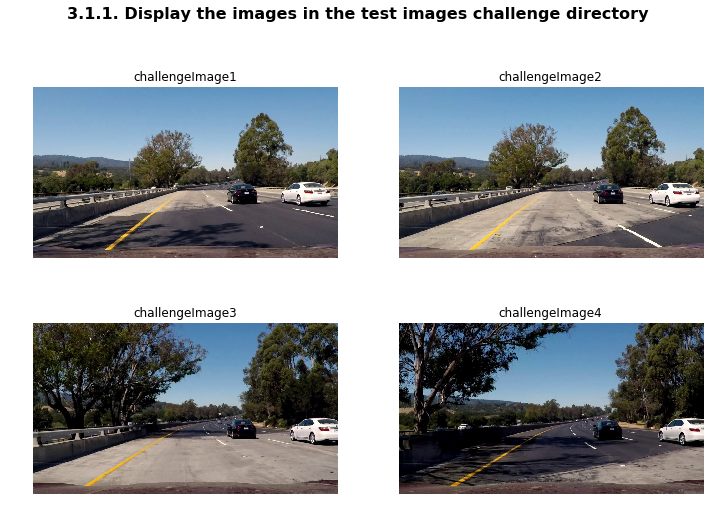

In [25]:
test_images = os.listdir("test_images_challenge")

# initiate figure and subplots
fig = plt.figure(figsize=[12,8])
nrows, ncols = 2, 2

for i, test_image in enumerate(test_images, 1):
    # construct the path to locate the image
    root_directory = "test_images_challenge"
    image_path = test_image
    path = os.path.join(root_directory, image_path)
    
    # read and make a copy of the image
    read_image = mpimg.imread(path)
    
    # display the image
    ax = fig.add_subplot(nrows, ncols, i)
    ax.imshow(read_image)
    ax.set_title(test_image.split('.')[0])
    ax.axis('off');
    
# adjust subplots and add title
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.subplots_adjust(top=0.85)
plt.suptitle('3.1.1. Display the images in the test images challenge directory\n', fontsize = 16, weight = 'bold');

# savefig by passing (bbox_inches='tight'),which will adjust the figure to include all of the x and y labels
plt.savefig('test_images_output/3.1.1. Display the images in the test images challenge \
            directory.png', dpi=300, bbox_inches='tight')

#### 3.1.2. Convert the images to grayscale (single channel)

<p style="text-align:justify">As all the images in the test directory are colored (RGB channel), convert the images to single channel/grayscale for further computer vision operations.</p>

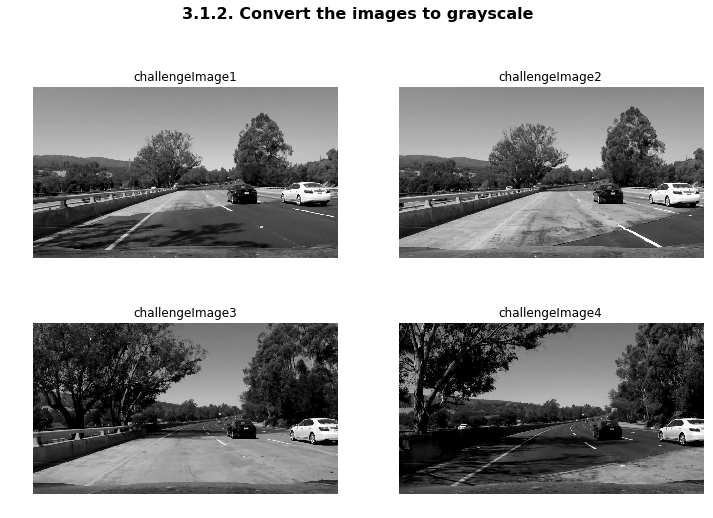

In [26]:
test_images = os.listdir("test_images_challenge")

# initiate figure and subplots
fig = plt.figure(figsize=[12,8])
nrows, ncols = 2, 2

for i, test_image in enumerate(test_images, 1):
    # construct the path to locate the image
    root_directory = "test_images_challenge"
    image_path = test_image
    path = os.path.join(root_directory, image_path)
    
    # read and make a copy of the image
    read_image = mpimg.imread(path)
    image = np.copy(read_image)
    
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # display the image
    ax = fig.add_subplot(nrows, ncols, i)
    ax.imshow(gray, cmap='gray')
    ax.set_title(test_image.split('.')[0])
    ax.axis('off');
    
# adjust subplots and add title
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.subplots_adjust(top=0.85)
plt.suptitle('3.1.2. Convert the images to grayscale\n', fontsize = 16, weight = 'bold');

# savefig by passing (bbox_inches='tight'),which will adjust the figure to include all of the x and y labels
plt.savefig('test_images_output/3.1.2. Convert the images to grayscale.png', dpi=300, bbox_inches='tight')

#### 3.1.3 Blur the grayscale image

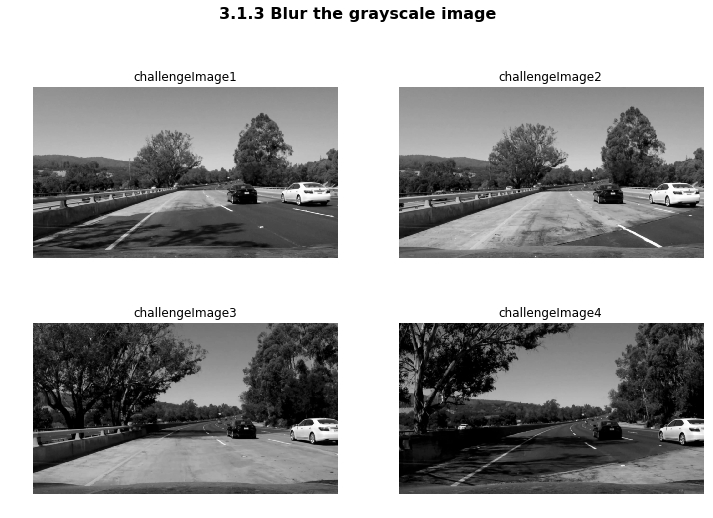

In [27]:
test_images = os.listdir("test_images_challenge")

# initiate figure and subplots
fig = plt.figure(figsize=[12,8])
nrows, ncols = 2, 2

for i, test_image in enumerate(test_images, 1):
    # construct the path to locate the image
    root_directory = "test_images_challenge"
    image_path = test_image
    path = os.path.join(root_directory, image_path)
    
    # read and make a copy of the image
    read_image = mpimg.imread(path)
    image = np.copy(read_image)
    
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Define a kernel size and apply Gaussian smoothing
    kernel_size = 5
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
    
    # display the image
    ax = fig.add_subplot(nrows, ncols, i)
    ax.imshow(blur_gray, cmap='gray')
    ax.set_title(test_image.split('.')[0])
    ax.axis('off');
    
# adjust subplots and add title
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.subplots_adjust(top=0.85)
plt.suptitle('3.1.3 Blur the grayscale image\n', fontsize = 16, weight = 'bold');

# savefig by passing (bbox_inches='tight'),which will adjust the figure to include all of the x and y labels
plt.savefig('test_images_output/3.1.3 Blur the grayscale image.png', dpi=300, bbox_inches='tight')

#### 3.1.4. Extract the edges in the image

<p style="text-align:justify">Extract the edges in the masked region by applying `Canny Edge detection` Computer Vision technique.</p>

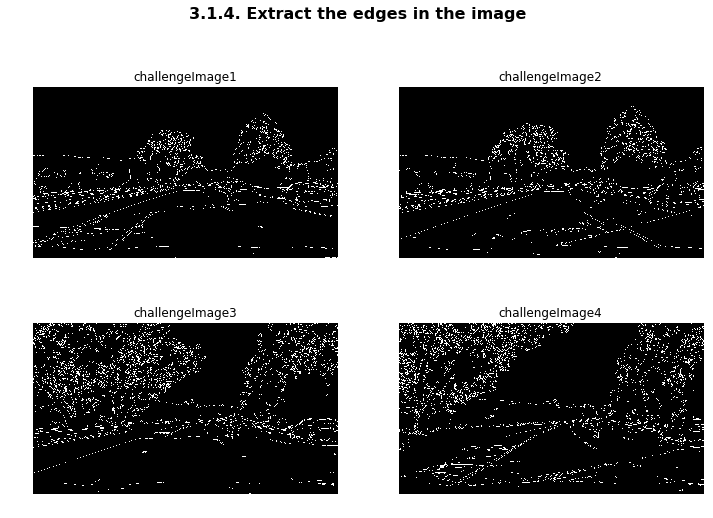

In [28]:
test_images = os.listdir("test_images_challenge")

# initiate figure and subplots
fig = plt.figure(figsize=[12,8])
nrows, ncols = 2, 2

for i, test_image in enumerate(test_images, 1):
    # construct the path to locate the image
    root_directory = "test_images_challenge"
    image_path = test_image
    path = os.path.join(root_directory, image_path)
    
    # read and make a copy of the image
    read_image = mpimg.imread(path)
    image = np.copy(read_image)
    
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Define a kernel size and apply Gaussian smoothing
    kernel_size = 5
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
    
    # Define our parameters for Canny and apply
    low_threshold = 50
    high_threshold = 150
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
    
    # display the image
    ax = fig.add_subplot(nrows, ncols, i)
    ax.imshow(edges, cmap='gray')
    ax.set_title(test_image.split('.')[0])
    ax.axis('off');
    
# adjust subplots and add title
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.subplots_adjust(top=0.85)
plt.suptitle('3.1.4. Extract the edges in the image\n', fontsize = 16, weight = 'bold');

# savefig by passing (bbox_inches='tight'),which will adjust the figure to include all of the x and y labels
plt.savefig('test_images_output/3.1.4. Extract the edges in the image.png', dpi=300, bbox_inches='tight')

#### 3.1.5. Identify the region of interest

<p style="text-align:justify">Identify the region of interest that is used for further operations. Take consideration of the `hood of the car` and eliminate it from the region of interest.</p>

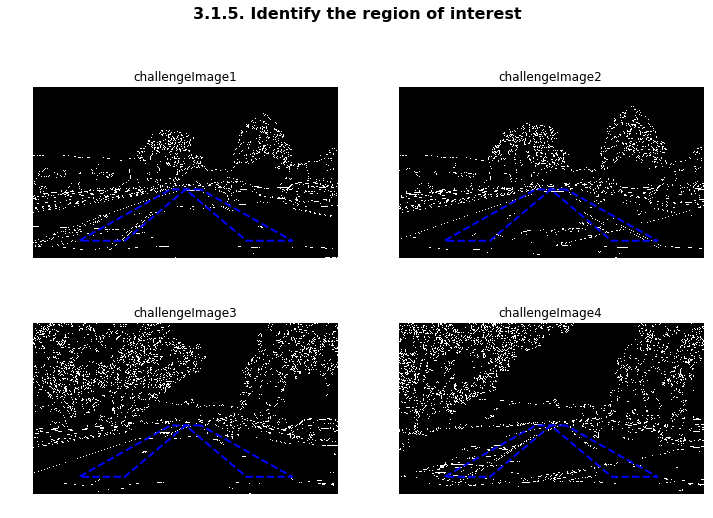

In [29]:
test_images = os.listdir("test_images_challenge")

# initiate figure and subplots
fig = plt.figure(figsize=[12,8])
nrows, ncols = 2, 2

for i, test_image in enumerate(test_images, 1):
    # construct the path to locate the image
    root_directory = "test_images_challenge"
    image_path = test_image
    path = os.path.join(root_directory, image_path)
    
    # read and make a copy of the image
    read_image = mpimg.imread(path)
    image = np.copy(read_image)
    
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Define a kernel size and apply Gaussian smoothing
    kernel_size = 5
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
    
    # Define our parameters for Canny and apply
    low_threshold = 50
    high_threshold = 150
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
    
    # identify the region of interest
    imshape = image.shape
    x = [.55*imshape[1], .45*imshape[1], .15*imshape[1], .30*imshape[1], 
         .50*imshape[1], .70*imshape[1], .85*imshape[1], .55*imshape[1]]
    y = [.60*imshape[0], .60*imshape[0], .90*imshape[0], .90*imshape[0], 
         .60*imshape[0], .90*imshape[0], .90*imshape[0], .60*imshape[0]]
    
    # display the image
    ax = fig.add_subplot(nrows, ncols, i)
    ax.imshow(edges, cmap='gray')
    ax.set_title(test_image.split('.')[0])
    ax.plot(x, y, 'b--', lw=2)
    ax.axis('off');
    
# adjust subplots and add title
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.subplots_adjust(top=0.85)
plt.suptitle('3.1.5. Identify the region of interest\n', fontsize = 16, weight = 'bold');

# savefig by passing (bbox_inches='tight'),which will adjust the figure to include all of the x and y labels
plt.savefig('test_images_output/3.1.5. Identify the region of interest.png', dpi=300, bbox_inches='tight')

#### 3.1.6. Mask the excess region in the images

<p style="text-align:justify">Keep the region of interest that is used for further operations and remove/darken the rest of the image to ease the identification of the lanes ahead of the vehicle.</p>

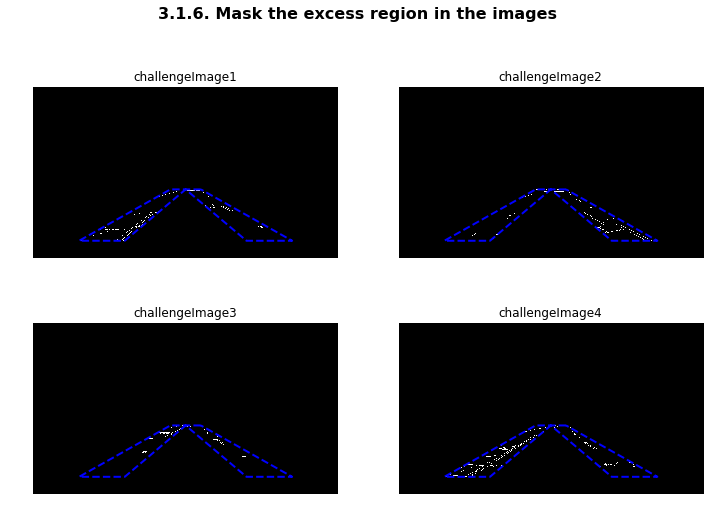

In [30]:
test_images = os.listdir("test_images_challenge")

# initiate figure and subplots
fig = plt.figure(figsize=[12,8])
nrows, ncols = 2, 2

for i, test_image in enumerate(test_images, 1):
    # construct the path to locate the image
    root_directory = "test_images_challenge"
    image_path = test_image
    path = os.path.join(root_directory, image_path)
    
    # read and make a copy of the image
    read_image = mpimg.imread(path)
    image = np.copy(read_image)
    
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Define a kernel size and apply Gaussian smoothing
    kernel_size = 5
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
    
    # Define our parameters for Canny and apply
    low_threshold = 50
    high_threshold = 150
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
    
    # identify the region of interest
    imshape = image.shape
    x = [.55*imshape[1], .45*imshape[1], .15*imshape[1], .30*imshape[1], 
         .50*imshape[1], .70*imshape[1], .85*imshape[1], .55*imshape[1]]
    y = [.60*imshape[0], .60*imshape[0], .90*imshape[0], .90*imshape[0], 
         .60*imshape[0], .90*imshape[0], .90*imshape[0], .60*imshape[0]]
    
    # Next we'll create a masked edges image using cv2.fillPoly()
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255 
    
    # This time we are defining a custom polygon to mask
    imshape = image.shape
    vertices = np.array([[(.55*imshape[1], .60*imshape[0]), 
                          (.45*imshape[1], .60*imshape[0]),  
                          (.15*imshape[1], .90*imshape[0]), 
                          (.30*imshape[1], .90*imshape[0]), 
                          (.50*imshape[1], .60*imshape[0]),
                          (.70*imshape[1], .90*imshape[0]),
                          (.85*imshape[1], .90*imshape[0]),
                          (.55*imshape[1], .60*imshape[0])]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    edges_masked = cv2.bitwise_and(edges, mask)
    
    # display the image
    ax = fig.add_subplot(nrows, ncols, i)
    ax.imshow(edges_masked, cmap='gray')
    ax.set_title(test_image.split('.')[0])
    ax.plot(x, y, 'b--', lw=2)
    ax.axis('off');
    
# adjust subplots and add title
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.subplots_adjust(top=0.85)
plt.suptitle('3.1.6. Mask the excess region in the images\n', fontsize = 16, weight = 'bold');

# savefig by passing (bbox_inches='tight'),which will adjust the figure to include all of the x and y labels
plt.savefig('test_images_output/3.1.6. Mask the excess region in the images.png', dpi=300, bbox_inches='tight')

#### 3.1.7. Draw Hough lines from the edges in the masked region

<p style="text-align:justify">Use Hough Line transformation to identify lines from the edges and draw the lines using various input parameters.</p>

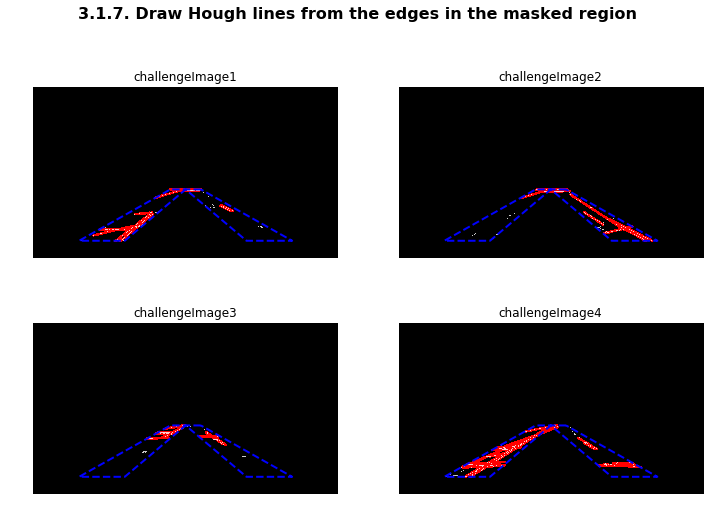

In [31]:
test_images = os.listdir("test_images_challenge")

# initiate figure and subplots
fig = plt.figure(figsize=[12,8])
nrows, ncols = 2, 2

for i, test_image in enumerate(test_images, 1):
    # construct the path to locate the image
    root_directory = "test_images_challenge"
    image_path = test_image
    path = os.path.join(root_directory, image_path)
    
    # read and make a copy of the image
    read_image = mpimg.imread(path)
    image = np.copy(read_image)
    
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Define a kernel size and apply Gaussian smoothing
    kernel_size = 5
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
    
    # Define our parameters for Canny and apply
    low_threshold = 50
    high_threshold = 150
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
    
    # identify the region of interest
    imshape = image.shape
    x = [.55*imshape[1], .45*imshape[1], .15*imshape[1], .30*imshape[1], 
         .50*imshape[1], .70*imshape[1], .85*imshape[1], .55*imshape[1]]
    y = [.60*imshape[0], .60*imshape[0], .90*imshape[0], .90*imshape[0], 
         .60*imshape[0], .90*imshape[0], .90*imshape[0], .60*imshape[0]]
    
    # Next we'll create a masked edges image using cv2.fillPoly()
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255 
    
    # This time we are defining a custom polygon to mask
    imshape = image.shape
    vertices = np.array([[(.55*imshape[1], .60*imshape[0]), 
                          (.45*imshape[1], .60*imshape[0]),  
                          (.15*imshape[1], .90*imshape[0]), 
                          (.30*imshape[1], .90*imshape[0]), 
                          (.50*imshape[1], .60*imshape[0]),
                          (.70*imshape[1], .90*imshape[0]),
                          (.85*imshape[1], .90*imshape[0]),
                          (.55*imshape[1], .60*imshape[0])]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    edges_masked = cv2.bitwise_and(edges, mask)
    
    # Define the Hough transform parameters
    # Make a blank the same size as our image to draw on
    rho = 1 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 40    # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 10 #minimum number of pixels making up a line
    max_line_gap = 70    # maximum gap in pixels between connectable line segments
    line_image = np.copy(image)*0 # creating a blank to draw lines on

    # Run Hough on edge detected image
    # Output "lines" is an array containing endpoints of detected line segments
    lines = cv2.HoughLinesP(edges_masked, rho, theta, threshold, np.array([]),
                                min_line_length, max_line_gap)
    
    # Iterate over the output "lines" and draw lines on a blank image
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

    # Create a "color" binary image to combine with line image
    color_edges = np.dstack((edges_masked, edges_masked, edges_masked)) 

    # Draw the lines on the edge image
    lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)
    
    # display the image
    ax = fig.add_subplot(nrows, ncols, i)
    ax.imshow(lines_edges, cmap='gray')
    ax.set_title(test_image.split('.')[0])
    ax.plot(x, y, 'b--', lw=2)
    ax.axis('off');
    
# adjust subplots and add title
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.subplots_adjust(top=0.85)
plt.suptitle('3.1.7. Draw Hough lines from the edges in the masked region\n', fontsize = 16, weight = 'bold');

# savefig by passing (bbox_inches='tight'),which will adjust the figure to include all of the x and y labels
plt.savefig('test_images_output/3.1.7. Draw Hough lines from the edges in the masked region.png', dpi=300, bbox_inches='tight')

#### 3.1.8. Superimpose the lines on the image to identify lane markings

<p style="text-align:justify">Superimpose the extracted lines on the original image to potray the identification of lane markings in the image.</p>

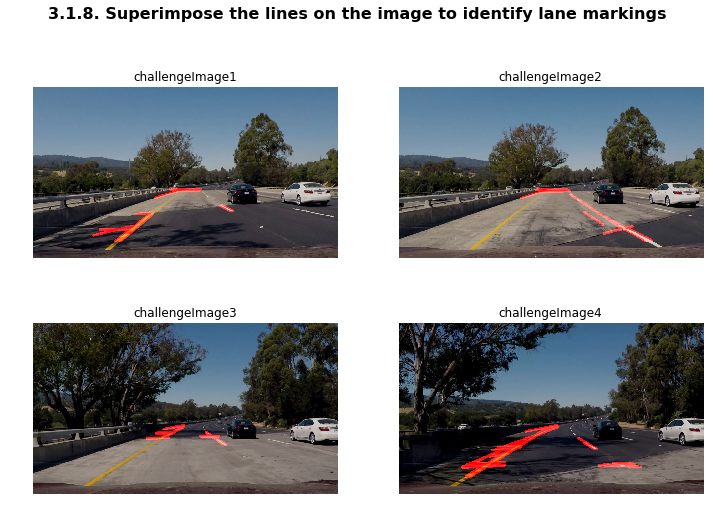

In [32]:
test_images = os.listdir("test_images_challenge")

# initiate figure and subplots
fig = plt.figure(figsize=[12,8])
nrows, ncols = 2, 2

for i, test_image in enumerate(test_images, 1):
    # construct the path to locate the image
    root_directory = "test_images_challenge"
    image_path = test_image
    path = os.path.join(root_directory, image_path)
    
    # read and make a copy of the image
    read_image = mpimg.imread(path)
    image = np.copy(read_image)
    
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Define a kernel size and apply Gaussian smoothing
    kernel_size = 5
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
    
    # Define our parameters for Canny and apply
    low_threshold = 50
    high_threshold = 150
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
    
    # Next we'll create a masked edges image using cv2.fillPoly()
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255 
    
    # This time we are defining a custom polygon to mask
    imshape = image.shape
    vertices = np.array([[(.55*imshape[1], .60*imshape[0]), 
                          (.45*imshape[1], .60*imshape[0]),  
                          (.15*imshape[1], .90*imshape[0]), 
                          (.30*imshape[1], .90*imshape[0]), 
                          (.50*imshape[1], .60*imshape[0]),
                          (.70*imshape[1], .90*imshape[0]),
                          (.85*imshape[1], .90*imshape[0]),
                          (.55*imshape[1], .60*imshape[0])]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    edges_masked = cv2.bitwise_and(edges, mask)
    
    # Define the Hough transform parameters
    # Make a blank the same size as our image to draw on
    rho = 1 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 40    # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 10 #minimum number of pixels making up a line
    max_line_gap = 70    # maximum gap in pixels between connectable line segments
    line_image = np.copy(image)*0 # creating a blank to draw lines on

    # Run Hough on edge detected image
    # Output "lines" is an array containing endpoints of detected line segments
    lines = cv2.HoughLinesP(edges_masked, rho, theta, threshold, np.array([]),
                                min_line_length, max_line_gap)
    
    # Iterate over the output "lines" and draw lines on a blank image
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

    # Draw the lines on the copy of the origical image
    image_lines = cv2.addWeighted(image, 0.8, line_image, 1, 0)
    
    # display the image
    ax = fig.add_subplot(nrows, ncols, i)
    ax.imshow(image_lines)
    ax.set_title(test_image.split('.')[0])
    ax.axis('off');
    
# adjust subplots and add title
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.subplots_adjust(top=0.85)
plt.suptitle('3.1.8. Superimpose the lines on the image to identify lane markings\n', fontsize = 16, weight = 'bold');

# savefig by passing (bbox_inches='tight'),which will adjust the figure to include all of the x and y labels
plt.savefig('test_images_output/3.1.8. Superimpose the lines on the image to identify \
            lane markings.png', dpi=300, bbox_inches='tight')

#### 3.1.9. Filter the redundant lines in the images

<p style="text-align:justify">Remove any lines with extreme slopes based on the position, that is left side or right side of the road in the image.</p>

Left Lane with slope :  -0.7828947368421053
Left Lane with slope :  -0.837037037037037
Left Lane with slope :  -0.7828947368421053
Left Lane with slope :  -0.8382352941176471
Right Lane with slope:   0.5227272727272727
Right Lane with slope:   0.5142857142857142
Right Lane with slope:   0.5085714285714286
Right Lane with slope:   0.5081967213114754
Right Lane with slope:   0.6504424778761062
Right Lane with slope:   0.65
Right Lane with slope:   0.6013513513513513
Right Lane with slope:   0.6463414634146342
Right Lane with slope:   0.7
Left Lane with slope :  -0.5128205128205128
Left Lane with slope :  -0.6233333333333333
Left Lane with slope :  -0.6
Left Lane with slope :  -0.6007326007326007
Right Lane with slope:   0.5952380952380952
Left Lane with slope :  -0.6007751937984496
Right Lane with slope:   0.6025641025641025


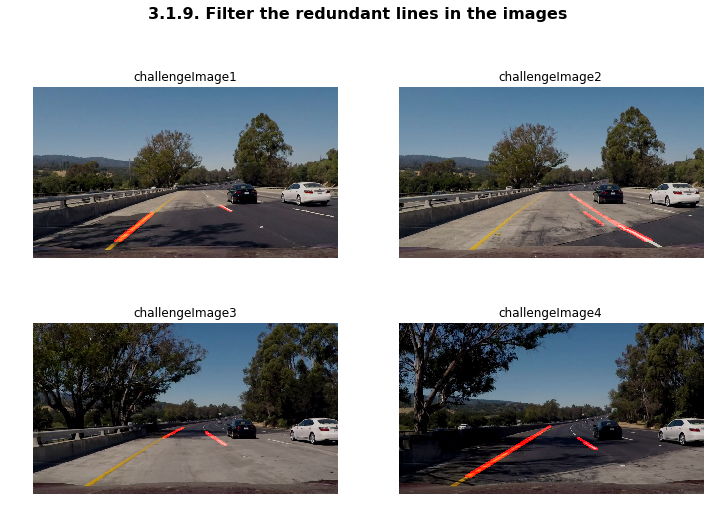

In [33]:
test_images = os.listdir("test_images_challenge")

# initiate figure and subplots
fig = plt.figure(figsize=[12,8])
nrows, ncols = 2, 2

for i, test_image in enumerate(test_images, 1):
    # construct the path to locate the image
    root_directory = "test_images_challenge"
    image_path = test_image
    path = os.path.join(root_directory, image_path)
    
    # read and make a copy of the image
    read_image = mpimg.imread(path)
    image = np.copy(read_image)
    
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Define a kernel size and apply Gaussian smoothing
    kernel_size = 5
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
    
    # Define our parameters for Canny and apply
    low_threshold = 50
    high_threshold = 150
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
    
    # Next we'll create a masked edges image using cv2.fillPoly()
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255 
    
    # This time we are defining a custom polygon to mask
    imshape = image.shape
    vertices = np.array([[(.55*imshape[1], .60*imshape[0]), 
                          (.45*imshape[1], .60*imshape[0]),  
                          (.15*imshape[1], .90*imshape[0]), 
                          (.30*imshape[1], .90*imshape[0]), 
                          (.50*imshape[1], .60*imshape[0]),
                          (.70*imshape[1], .90*imshape[0]),
                          (.85*imshape[1], .90*imshape[0]),
                          (.55*imshape[1], .60*imshape[0])]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    edges_masked = cv2.bitwise_and(edges, mask)
    
    # Define the Hough transform parameters
    # Make a blank the same size as our image to draw on
    rho = 1 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 40    # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 10 #minimum number of pixels making up a line
    max_line_gap = 70    # maximum gap in pixels between connectable line segments
    line_image = np.copy(image)*0 # creating a blank to draw lines on

    # Run Hough on edge detected image
    # Output "lines" is an array containing endpoints of detected line segments
    lines = cv2.HoughLinesP(edges_masked, rho, theta, threshold, np.array([]),
                                min_line_length, max_line_gap)
    
    # Iterate over the output "lines" and draw lines on a blank image
    for line in lines:
        for x1,y1,x2,y2 in line:
            try:
                slope = (y2-y1)/(x2-x1)
            except ZeroDivisionError:
                slope = np.inf            
            
            if slope > 0.5 and slope < 10 and x1 > (.50*imshape[1]) and x2 > (.50*imshape[1]):
                print('Right Lane with slope:  ',slope)
                cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
            elif slope < -0.5 and slope > -10 and x1 < (.50*imshape[1]) and x2 < (.50*imshape[1]):
                print('Left Lane with slope : ',slope)
                cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

    # Draw the lines on the copy of the origical image
    image_lines = cv2.addWeighted(image, 0.8, line_image, 1, 0)
    
    # display the image
    ax = fig.add_subplot(nrows, ncols, i)
    ax.imshow(image_lines)
    ax.set_title(test_image.split('.')[0])
    ax.axis('off');
    
# adjust subplots and add title
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.subplots_adjust(top=0.85)
plt.suptitle('3.1.9. Filter the redundant lines in the images\n', fontsize = 16, weight = 'bold');

# savefig by passing (bbox_inches='tight'),which will adjust the figure to include all of the x and y labels
plt.savefig('test_images_output/3.1.9. Filter the redundant lines in the images.png', dpi=300, bbox_inches='tight')

#### 3.1.10. Extrapoate lines with linear regression

<p style="text-align:justify">Sort the lines based on the position (left lane, right lane) and perform a linear regression on the points based on their co-ordinates to fit the best line. Also perform the weighted addition of the slopes with previous slope with low learning rate to increase the stability of the line.</p>

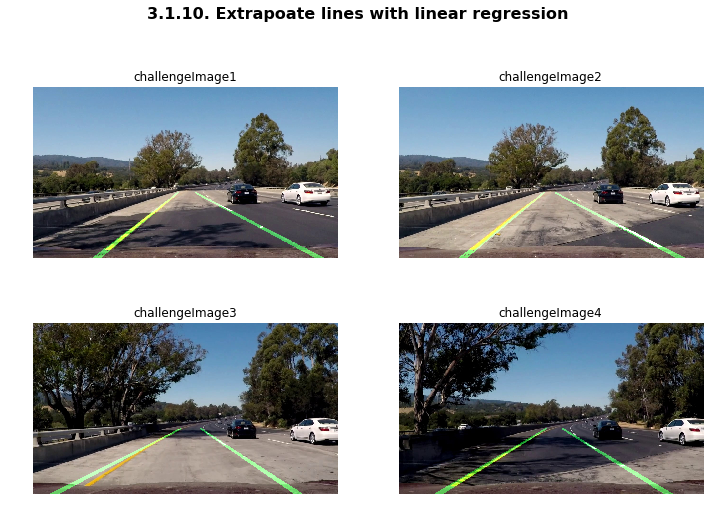

In [34]:
test_images = os.listdir("test_images_challenge")

# initiate figure and subplots
fig = plt.figure(figsize=[12,8])
nrows, ncols = 2, 2

for i, test_image in enumerate(test_images, 1):
    # construct the path to locate the image
    root_directory = "test_images_challenge"
    image_path = test_image
    path = os.path.join(root_directory, image_path)
    
    # read and make a copy of the image
    read_image = mpimg.imread(path)
    image = np.copy(read_image)
    
    # convert the image to grayscale
    gray_image = grayscale(image)
    
    # Define a kernel size and apply Gaussian smoothing
    blur_gray = gaussian_blur(gray_image, kernel_size = 5)

    # Define our parameters for Canny and apply
    edges = canny(blur_gray, low_threshold = 50, high_threshold = 150)
    
    # maske the region of interest
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255   

    # This time we are defining a four sided polygon to mask
    imshape = image.shape
    vertices = np.array([[(.55*imshape[1], .60*imshape[0]), 
                          (.45*imshape[1], .60*imshape[0]),  
                          (.15*imshape[1], .90*imshape[0]), 
                          (.30*imshape[1], .90*imshape[0]), 
                          (.50*imshape[1], .60*imshape[0]),
                          (.70*imshape[1], .90*imshape[0]),
                          (.85*imshape[1], .90*imshape[0]),
                          (.55*imshape[1], .60*imshape[0])]], dtype=np.int32)
    
    masked_edges = region_of_interest(edges, vertices)
    
    # draw lines using hough transform
    line_image= hough_lines_extrapolated(masked_edges, rho = 1, theta = np.pi/180, 
                                         threshold = 40, min_line_len = 10, max_line_gap = 70)

    
    # perform weighted addition of line_image and original image to potray lane markings
    image_lanes = weighted_img(line_image, image, α=1, β=0.6, γ=0.)
    
    # display the image
    ax = fig.add_subplot(nrows, ncols, i)
    ax.imshow(image_lanes)
    ax.set_title(test_image.split('.')[0])
    ax.axis('off');
    
# adjust subplots and add title
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.subplots_adjust(top=0.85)
plt.suptitle('3.1.10. Extrapoate lines with linear regression\n', fontsize = 16, weight = 'bold');

# savefig by passing (bbox_inches='tight'),which will adjust the figure to include all of the x and y labels
plt.savefig('test_images_output/3.1.10. Extrapoate lines with linear regression.png', dpi=300, bbox_inches='tight')

#### 3.1.11. Extrapoate lines on test images set

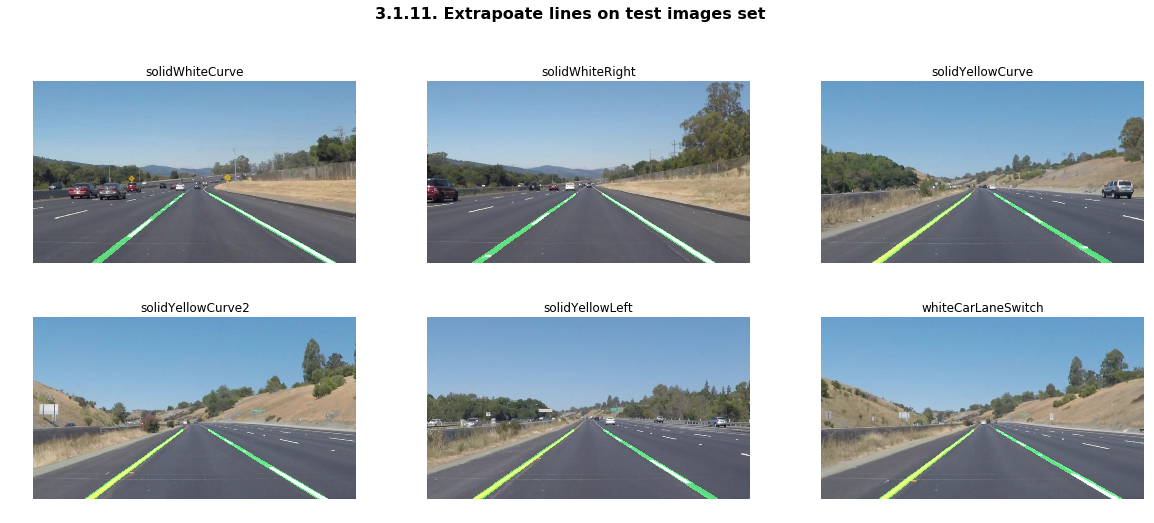

In [35]:
test_images = os.listdir("test_images")

# initiate figure and subplots
fig = plt.figure(figsize=[20,8])
nrows, ncols = 2, 3

for i, test_image in enumerate(test_images, 1):
    # construct the path to locate the image
    root_directory = "test_images"
    image_path = test_image
    path = os.path.join(root_directory, image_path)
    
    # read and make a copy of the image
    read_image = mpimg.imread(path)
    image = np.copy(read_image)
    
    # convert the image to grayscale
    gray_image = grayscale(image)
    
    # Define a kernel size and apply Gaussian smoothing
    blur_gray = gaussian_blur(gray_image, kernel_size = 5)

    # Define our parameters for Canny and apply
    edges = canny(blur_gray, low_threshold = 50, high_threshold = 150)
    
    # maske the region of interest
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255   

    # This time we are defining a four sided polygon to mask
    imshape = image.shape
    vertices = np.array([[(.55*imshape[1], .60*imshape[0]), 
                          (.45*imshape[1], .60*imshape[0]),  
                          (.15*imshape[1], .90*imshape[0]), 
                          (.30*imshape[1], .90*imshape[0]), 
                          (.50*imshape[1], .60*imshape[0]),
                          (.70*imshape[1], .90*imshape[0]),
                          (.85*imshape[1], .90*imshape[0]),
                          (.55*imshape[1], .60*imshape[0])]], dtype=np.int32)
    
    masked_edges = region_of_interest(edges, vertices)
    
    # draw lines using hough transform
    line_image= hough_lines_extrapolated(masked_edges, rho = 1, theta = np.pi/180, 
                                         threshold = 40, min_line_len = 10, max_line_gap = 70)

    
    # perform weighted addition of line_image and original image to potray lane markings
    image_lanes = weighted_img(line_image, image, α=1, β=0.6, γ=0.)
    
    # display the image
    ax = fig.add_subplot(nrows, ncols, i)
    ax.imshow(image_lanes)
    ax.set_title(test_image.split('.')[0])
    ax.axis('off');
    
# adjust subplots and add title
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.subplots_adjust(top=0.85)
plt.suptitle('3.1.11. Extrapoate lines on test images set\n', fontsize = 16, weight = 'bold');

# savefig by passing (bbox_inches='tight'),which will adjust the figure to include all of the x and y labels
plt.savefig('test_images_output/3.1.11. Extrapoate lines on test images set.png', dpi=300, bbox_inches='tight')

**`Optional content walkthrough:`**

#### 3.1.12 Linear Regression
> <p style="text-align:justify">How extraplation of line from points achieved with linear regression? Follow the optional content walkthrough to understand the process of fitting the line using the linear regression, a machine learning supervised model.</p>

In [36]:
def draw_lines_linear_regression(img, lines, color=[9, 219, 44], thickness=8):
    """
    NOTE:
    This function draws the extrapolated `lines` with `color` and `thickness`.
    Removed redundant lines with extreme slopes.
    Returns the co-ordinate points on each side of the lane.
    """
    
    rx = []
    ry = []
    lx = []
    ly = []
    
    for line in lines:
        for x1,y1,x2,y2 in line:
            slope = (y2-y1)/(x2-x1)
            center = [(x1+x2)/2, (y1+y2)/2]
            
            if slope > 0.5 and slope < 10: 
                rx.extend([x1,x2])
                ry.extend([y1,y2])
            elif slope < -0.5 and slope > -10:
                lx.extend([x1,x2])
                ly.extend([y1,y2])
                
    return rx, ry, lx, ly


def hough_lines_linear_regression(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), 
                            minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    rx, ry, lx, ly = draw_lines_linear_regression(line_img, lines)
    return line_img, rx, ry, lx, ly

In [37]:
def process_image_linear_regression(read_image):
    '''NOTE: The output you return should be a color image (3 channel) for processing video below'''
    
    # read and make a copy of the image
    image = np.copy(read_image)
    
    # convert the image to grayscale
    gray_image = grayscale(image)
    
    # Define a kernel size and apply Gaussian smoothing
    blur_gray = gaussian_blur(gray_image, kernel_size = 5)

    # Define our parameters for Canny and apply
    edges = canny(blur_gray, low_threshold = 50, high_threshold = 150)
    
    # maske the region of interest
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255   

    # This time we are defining a four sided polygon to mask
    imshape = image.shape
    vertices = np.array([[(.55*imshape[1], .60*imshape[0]), 
                          (.45*imshape[1], .60*imshape[0]),  
                          (.15*imshape[1], .90*imshape[0]), 
                          (.30*imshape[1], .90*imshape[0]), 
                          (.50*imshape[1], .60*imshape[0]),
                          (.70*imshape[1], .90*imshape[0]),
                          (.85*imshape[1], .90*imshape[0]),
                          (.55*imshape[1], .60*imshape[0])]], dtype=np.int32)
    
    masked_edges = region_of_interest(edges, vertices)
    
    # draw lines using hough transform
    line_image, rx, ry, lx, ly = hough_lines_linear_regression(masked_edges, rho = 2, theta = np.pi/180, 
                                                               threshold = 10, min_line_len = 40, max_line_gap = 20)

    
    # perform weighted addition of line_image and original image to potray lane markings
    image_lanes = weighted_img(line_image, image, α=0.8, β=1.0, γ=0.)
    result = image_lanes
    
    # return the final image where lines are drawn on lanes
    return result, rx, ry, lx, ly

**Obtain individual points related to left lane and right lanes for a test image:**

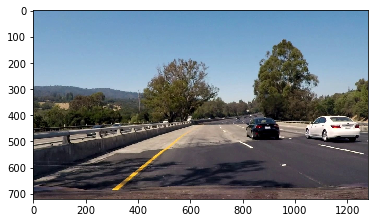

In [38]:
root_directory = "test_images_challenge"
image_path = 'challengeImage1.jpg'
path = os.path.join(root_directory, image_path)
read_image= mpimg.imread(path)
plt.imshow(read_image);

In [39]:
image, rx, ry, lx, ly  = process_image_linear_regression(read_image)

In [40]:
imshape = image.shape
imshape

(720, 1280, 3)

**<ins>Right Lane:</ins>**

In [41]:
rx, ry

([794, 840], [500, 524])

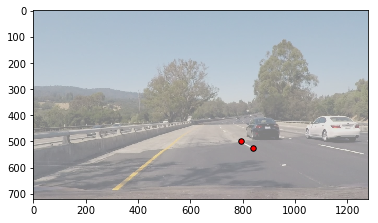

In [42]:
plt.imshow(image, alpha=0.5)
plt.scatter(rx, ry, color = 'red', s = 30, edgecolors='black');

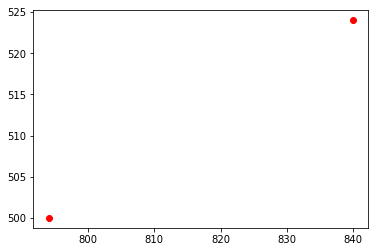

In [43]:
plt.scatter(rx, ry, color = 'red');

**Fit the Linear Regression:**

In [44]:
rx = np.array(rx)
rx = rx.reshape(-1,1)
rx.shape

(2, 1)

In [45]:
reg.fit(rx, ry)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

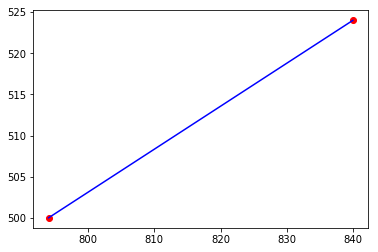

In [46]:
plt.scatter(rx,ry, color = 'red')
plt.plot(rx, reg.predict(rx), color='blue');

In [47]:
reg.coef_, reg.intercept_

(array([0.52173913]), 85.73913043478251)

In [48]:
y1 = imshape[0] 
x1 = (y1 - reg.intercept_) / reg.coef_[0]

In [49]:
y2 = 0.65 * imshape[0] 
x2 = (y2 - reg.intercept_) / reg.coef_[0]

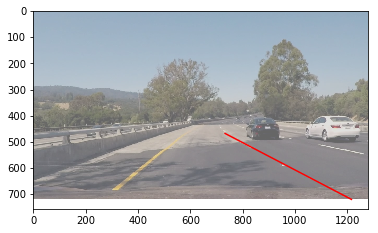

In [50]:
plt.imshow(image, alpha = 0.6)

r_x = [x1, x2]
r_y = [y1, y2]
plt.plot(r_x, r_y, color = 'red');

**<ins>Left Lane:</ins>**

In [51]:
lx, ly

([346, 498, 368, 494, 377, 420, 349, 404],
 [648, 529, 647, 541, 641, 605, 646, 604])

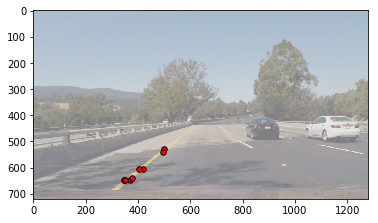

In [52]:
plt.imshow(image, alpha=0.5)
plt.scatter(lx, ly, color = 'red', s = 30, edgecolors='black');

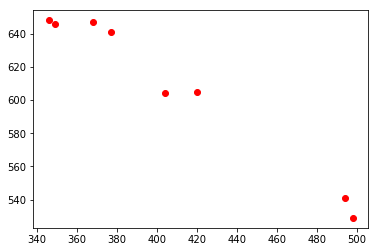

In [53]:
plt.scatter(lx, ly, color = 'red');

**Fit the Linear Regression:**

In [54]:
lx = np.array(lx)
lx = lx.reshape(-1,1)
lx.shape

(8, 1)

In [55]:
reg.fit(lx,ly)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

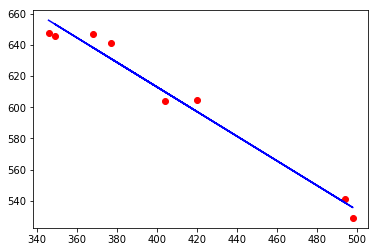

In [56]:
plt.scatter(lx,ly, color = 'red')
plt.plot(lx, reg.predict(lx), color='blue');

In [57]:
reg.coef_, reg.intercept_

(array([-0.79110206]), 929.6035384193624)

In [58]:
y1 = imshape[0] 
x1 = (y1 - reg.intercept_) / reg.coef_[0]

In [59]:
y2 = 0.65 * imshape[0] 
x2 = (y2 - reg.intercept_) / reg.coef_[0]

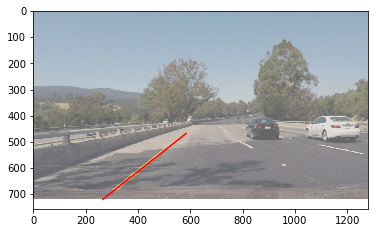

In [60]:
plt.imshow(image, alpha = 0.6)

l_x = [x1, x2]
l_y = [y1, y2]
plt.plot(l_x, l_y, color = 'red');

**<ins>Right Lane and Left Lane combined:</ins>**

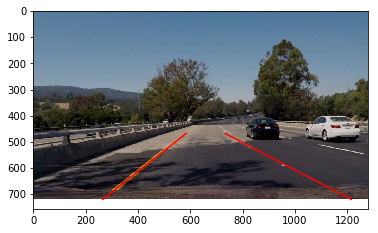

In [61]:
plt.imshow(image)
plt.plot(l_x, l_y, color = 'red');
plt.plot(r_x, r_y, color = 'red');

<div>
    <p style="text-align:center;font-family:'Courier New';font-size:14px">-------- End of `3.1. Extrapolated Lane Line Detection on images` --------
    </p>
</div>

----

### 3.2 <ins>Extrapolated Lane Line Detection on videos</ins>

#### Goal: An example of the desired output

In [62]:
HTML("""
<video width="480" height="270" controls>
  <source src="{0}">
</video>
""".format("examples/P1_example.mp4"))

#### Pipeline

In [63]:
def process_image_extrapolated(read_image):
    '''NOTE: The output you return should be a color image (3 channel) for processing video below'''
    
    # read and make a copy of the image
    image = np.copy(read_image)
    
    # convert the image to grayscale
    gray_image = grayscale(image)
    
    # Define a kernel size and apply Gaussian smoothing
    blur_gray = gaussian_blur(gray_image, kernel_size = 5)

    # Define our parameters for Canny and apply
    edges = canny(blur_gray, low_threshold = 50, high_threshold = 150)
    
    # maske the region of interest
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255   

    # This time we are defining a four sided polygon to mask
    imshape = image.shape
    vertices = np.array([[(.55*imshape[1], .60*imshape[0]), 
                          (.45*imshape[1], .60*imshape[0]),  
                          (.15*imshape[1], .90*imshape[0]), 
                          (.30*imshape[1], .90*imshape[0]), 
                          (.50*imshape[1], .60*imshape[0]),
                          (.70*imshape[1], .90*imshape[0]),
                          (.85*imshape[1], .90*imshape[0]),
                          (.55*imshape[1], .60*imshape[0])]], dtype=np.int32)
    
    masked_edges = region_of_interest(edges, vertices)
    
    # draw lines using hough transform
    line_image= hough_lines_extrapolated(masked_edges, rho = 1, theta = np.pi/180, 
                                         threshold = 40, min_line_len = 10, max_line_gap = 70)

    
    # perform weighted addition of line_image and original image to potray lane markings
    image_lanes = weighted_img(line_image, image, α=1, β=0.6, γ=0.)
    result = image_lanes
    
    # return the final image where lines are drawn on lanes
    return result

#### 3.2.1. Detect extrapolated Lane Lines in `solidWhiteRight` video

In [64]:
white_output = 'test_videos_output/1_2_solidWhiteRight_extrapolated.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image_extrapolated) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

t:   1%|▍                            | 3/221 [00:00<00:12, 17.86it/s, now=None]

Moviepy - Building video test_videos_output/1_2_solidWhiteRight_extrapolated.mp4.
Moviepy - Writing video test_videos_output/1_2_solidWhiteRight_extrapolated.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/1_2_solidWhiteRight_extrapolated.mp4
Wall time: 7.17 s


Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [65]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

#### 3.2.2. Detect extrapolated Lane Lines in `solidYellowLeft` video

In [66]:
yellow_output = 'test_videos_output/2_2_solidYellowLeft_extrapolated.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image_extrapolated)
%time yellow_clip.write_videofile(yellow_output, audio=False)

t:   0%|                             | 2/681 [00:00<00:36, 18.68it/s, now=None]

Moviepy - Building video test_videos_output/2_2_solidYellowLeft_extrapolated.mp4.
Moviepy - Writing video test_videos_output/2_2_solidYellowLeft_extrapolated.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/2_2_solidYellowLeft_extrapolated.mp4
Wall time: 21.3 s


In [67]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

#### 3.2.3. Detect extrapolated Lane Lines in `challenge` video

In [68]:
challenge_output = 'test_videos_output/3_2_challenge_extrapolated.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
# clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,4)
clip3 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3.fl_image(process_image_extrapolated)
%time challenge_clip.write_videofile(challenge_output, audio=False)

t:   1%|▏                            | 2/251 [00:00<00:12, 19.80it/s, now=None]

Moviepy - Building video test_videos_output/3_2_challenge_extrapolated.mp4.
Moviepy - Writing video test_videos_output/3_2_challenge_extrapolated.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/3_2_challenge_extrapolated.mp4
Wall time: 15.5 s


In [69]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))

> <p style="text-align:justify">The above videos depicts that the pipeline is able to identify the lane markings and draw the extrapolated lines in the videos `1_2_solidWhiteRight_houghlines` and `2_2_solidYellowLeft_houghlines`. It also performs well on the `3_2_challenge_houghlines` video because of the modifications in the helper functions.</p>

`References:`

+ https://phet.colorado.edu/sims/html/graphing-lines/latest/graphing-lines_en.html
+ http://www.shodor.org/interactivate/activities/SlopeSlider/

<div>
    <p style="text-align:center;font-family:'Courier New';font-size:14px">-------- End of `3.2. Extrapolated Lane Line Detection on videos` --------
    </p>
</div>

------

## 4. `Stabilize the Extrapolated Lane Line Detection`
========================================================================

<p style="text-align:justify">Stabilize the extrapolated lines by defining a learning rate with the previously detected lines.</p>

**`Helper Functions Extrapolated and Stabilized:`**

In [70]:
def add_image_lines(img, x1, y1, x2, y2, x3, color, thickness):
    imshape = img.shape
    x1 = int(np.round(x1, 0))
    x2 = int(np.round(x2, 0))
    x3 = int(np.round(x3, 0))
    dx_r = int(np.round(x1 + (imshape[1]/100), 0))
    dx_l = int(np.round(x1 - (imshape[1]/100), 0))
    dy = int(np.round(y2 + (imshape[0]/50), 0))
    y1 = int(np.round(y1, 0))
    y2 = int(np.round(y2, 0))
    # draw the lines
    cv2.line(img, (x1, y1), (x2, y2), color, thickness)
    cv2.line(img, (dx_r, y1), (x3, dy), color, thickness)
    cv2.line(img, (dx_l, y1), (x3, dy), color, thickness)
    
    # fill the lines
    ignore_mask_color = color
    vertices = np.array([[(dx_r, y1), 
                          (dx_l, y1), 
                          (x2, y2)]], dtype = np.int32)
    cv2.fillPoly(img, vertices, ignore_mask_color)


def draw_lines_extrapolated_stable(img, lines, color=[9, 219, 44], thickness=5):
    """
    NOTE:
    This function draws the extrapolated `lines` with `color` and `thickness`.
    Removed redundant lines with extreme slopes.
    Introduced a lerning rate to stabilize the lines with respect to previous values.
    Used Linear regression to fit the line from the points on each side of the lane.
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() in the function below.
    """
    
    global r_x1
    global r_x2
    global r_x3
    global l_x1
    global l_x2
    global l_x3
    
    rc = np.array([])
    lc = np.array([])
    rx = np.array([])
    ry = np.array([])
    lx = np.array([])
    ly = np.array([])
    
    imshape = img.shape
    
    for line in lines:
        for x1,y1,x2,y2 in line:
            center = [(x1+x2)/2, (y1+y2)/2]
    
            try:
                slope = (y2-y1)/(x2-x1)
            except ZeroDivisionError:
                slope = np.inf            
            
            if slope > 0.5 and slope < 10 and x1 > (.50*imshape[1]) and x2 > (.50*imshape[1]):
                rc = np.append(rc, center)
                rx = np.append(rx, [x1,x2])
                ry = np.append(ry, [y1,y2])
                
            elif slope < -0.5 and slope > -10 and x1 < (.50*imshape[1]) and x2 < (.50*imshape[1]):
                lc = np.append(lc, center)
                lx = np.append(lx, [x1,x2])
                ly = np.append(ly, [y1,y2])
    

    r_center = np.mean(rc, axis = 0)
    l_center = np.mean(lc, axis = 0)
    y1 = imshape[0]
    y2 = imshape[0]*0.65
    
    if not np.isnan(r_center).all():
        rx = rx.reshape(-1,1)
        reg.fit(rx, ry)
        r_slope, r_intercept = reg.coef_[0], reg.intercept_
        if r_slope > 0.5 and r_slope < 10:
            r_x1_new = (y1 - r_intercept) / r_slope
            r_x2_new = (y2 - r_intercept) / r_slope
            r_x3_new = ((y2 + (imshape[0]/50)) - r_intercept) / r_slope
            
            if r_x1 == 0:
                learning_rate = 1
            else:
                learning_rate = 0.2
                
            r_x1 = (learning_rate * r_x1_new) + ((1 - learning_rate) * r_x1)
            r_x2 = (learning_rate * r_x2_new) + ((1 - learning_rate) * r_x2)
            r_x3 = (learning_rate * r_x3_new) + ((1 - learning_rate) * r_x3)
            add_image_line(img, r_x1, y1, r_x2, y2, r_x3, color, thickness)
        else:
            add_image_line(img, r_x1, y1, r_x2, y2, r_x3, color, thickness)
        
    elif np.isnan(r_center).all():
        add_image_line(img, r_x1, y1, r_x2, y2, r_x3, color, thickness)
    
    if not np.isnan(l_center).all():
        lx = lx.reshape(-1,1)
        reg.fit(lx, ly)
        l_slope, l_intercept = reg.coef_[0], reg.intercept_
        if l_slope < -0.5 and l_slope > -10:
            l_x1_new = (y1 - l_intercept) / l_slope
            l_x2_new = (y2 - l_intercept) / l_slope
            l_x3_new = ((y2 + (imshape[0]/50)) - l_intercept) / l_slope
            
            if l_x1 == 0:
                learning_rate = 1
            else:
                learning_rate = 0.2
                
            l_x1 = (learning_rate * l_x1_new) + ((1 - learning_rate) * l_x1)
            l_x2 = (learning_rate * l_x2_new) + ((1 - learning_rate) * l_x2)
            l_x3 = (learning_rate * l_x3_new) + ((1 - learning_rate) * l_x3)
            add_image_line(img, l_x1, y1, l_x2, y2, l_x3, color, thickness)
        else:
            add_image_line(img, l_x1, y1, l_x2, y2, l_x3, color, thickness)
    
    elif np.isnan(l_center).all():
        add_image_line(img, l_x1, y1, l_x2, y2, l_x3, color, thickness)


def hough_lines_extrapolated_stable(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), 
                            minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines_extrapolated_stable(line_img, lines)
    return line_img

In [71]:
def process_image_extrapolated_stable(read_image):
    '''NOTE: The output you return should be a color image (3 channel) for processing video below'''
    
    # read and make a copy of the image
    image = np.copy(read_image)
    
    # convert the image to grayscale
    gray_image = grayscale(image)
    
    # Define a kernel size and apply Gaussian smoothing
    blur_gray = gaussian_blur(gray_image, kernel_size = 5)

    # Define our parameters for Canny and apply
    edges = canny(blur_gray, low_threshold = 50, high_threshold = 150)
    
    # maske the region of interest
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255   

    # This time we are defining a four sided polygon to mask
    imshape = image.shape
    vertices = np.array([[(.55*imshape[1], .60*imshape[0]), 
                          (.45*imshape[1], .60*imshape[0]),  
                          (.15*imshape[1], .90*imshape[0]), 
                          (.30*imshape[1], .90*imshape[0]), 
                          (.50*imshape[1], .60*imshape[0]),
                          (.70*imshape[1], .90*imshape[0]),
                          (.85*imshape[1], .90*imshape[0]),
                          (.55*imshape[1], .60*imshape[0])]], dtype=np.int32)
    
    masked_edges = region_of_interest(edges, vertices)
    
    # draw lines using hough transform
    line_image= hough_lines_extrapolated_stable(masked_edges, rho = 1, theta = np.pi/180, 
                                                threshold = 40, min_line_len = 10, max_line_gap = 70)

    
    # perform weighted addition of line_image and original image to potray lane markings
    image_lanes = weighted_img(line_image, image, α=1, β=0.6, γ=0.)
    result = image_lanes
    
    # return the final image where lines are drawn on lanes
    return result

#### 4.1.1. Stabilize the extrapolated Lane Lines in `solidWhiteRight` video

In [72]:
# Initiate global variables
r_x1 = 0
r_x2 = 0
r_x3 = 0
l_x1 = 0
l_x2 = 0
l_x3 = 0

In [73]:
white_output = 'test_videos_output/1_3_solidWhiteRight_extrapolated_stable.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image_extrapolated_stable) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

t:   1%|▍                            | 3/221 [00:00<00:10, 20.64it/s, now=None]

Moviepy - Building video test_videos_output/1_3_solidWhiteRight_extrapolated_stable.mp4.
Moviepy - Writing video test_videos_output/1_3_solidWhiteRight_extrapolated_stable.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/1_3_solidWhiteRight_extrapolated_stable.mp4
Wall time: 7.47 s


Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [74]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

#### 4.1.2. Stabilize extrapolated Lane Lines in `solidYellowLeft` video

In [75]:
# Reset global variables to its initial values to avoid carry forward from previous clips
r_x1 = 0
r_x2 = 0
r_x3 = 0
l_x1 = 0
l_x2 = 0
l_x3 = 0

In [76]:
yellow_output = 'test_videos_output/2_3_solidYellowLeft_extrapolated_stable.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image_extrapolated_stable)
%time yellow_clip.write_videofile(yellow_output, audio=False)

t:   0%|▏                            | 3/681 [00:00<00:24, 28.12it/s, now=None]

Moviepy - Building video test_videos_output/2_3_solidYellowLeft_extrapolated_stable.mp4.
Moviepy - Writing video test_videos_output/2_3_solidYellowLeft_extrapolated_stable.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/2_3_solidYellowLeft_extrapolated_stable.mp4
Wall time: 20.9 s


In [77]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

#### 4.1.3. Stabilize the extrapolated Lane Lines in `challenge` video

In [78]:
# Reset global variables to its initial values to avoid carry forward from previous clips
r_x1 = 0
r_x2 = 0
r_x3 = 0
l_x1 = 0
l_x2 = 0
l_x3 = 0

In [79]:
challenge_output = 'test_videos_output/3_3_challenge_extrapolated_stable.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
# clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,4)
clip3 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3.fl_image(process_image_extrapolated_stable)
%time challenge_clip.write_videofile(challenge_output, audio=False)

t:   1%|▎                            | 3/251 [00:00<00:09, 25.25it/s, now=None]

Moviepy - Building video test_videos_output/3_3_challenge_extrapolated_stable.mp4.
Moviepy - Writing video test_videos_output/3_3_challenge_extrapolated_stable.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/3_3_challenge_extrapolated_stable.mp4
Wall time: 15.4 s


In [80]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))

<div>
    <p style="text-align:center;font-family:'Courier New';font-size:14px">-------- End of `4. Stabilize the Extrapolated Lane Line Detection` --------
    </p>
</div>

-----

## 5. `Polyfill the Lane Line Detection`
========================================================================

<p style="text-align:justify">After Stabilizing the extrapolated lines by defining a learning rate with the previously detected lines, fill the coordinates between the left and right lane using poly fill method.</p>

<table><tr>
<td>
    <figure>
     <img src="examples/test_example-extrapolated.png" width="380" alt="Combined Image" />
     <figcaption>
     <p></p> 
     <p style="text-align: center;"> The orginal image used to detect land lines on the road</p> 
     </figcaption>
    </figure>
</td>
<td>
    <p style="font-size:30px;"><b>&#8594;</b></p>
</td>
<td> 
    <figure>
     <img src="examples/test_example-polyfill.png" width="380" alt="Combined Image" />
     <figcaption>
     <p></p> 
     <p style="text-align: center;"> The output detecting line segments using helper functions </p> 
     </figcaption>
    </figure>
</td>
</tr></table>

**`Helper Functions for poly fill:`**

In [81]:
def add_image_fill(img, r_x1, r_x2, l_x1, l_x2, y1, y2, ignore_mask_color):
    vertices = np.array([[(r_x1, y1), 
                          (l_x1, y1), 
                          (l_x2, y2), 
                          (r_x2, y2)]], dtype = np.int32)
    cv2.fillPoly(img, vertices, ignore_mask_color)


def draw_lines_fill(img, lines, color=[9, 219, 44], thickness=5):
    """
    NOTE:
    This function draws the extrapolated `lines` with `color` and `thickness`.
    Removed redundant lines with extreme slopes.
    Introduced a lerning rate to stabilize the lines with respect to previous values.
    Used Linear regression to fit the line from the points on each side of the lane.
    Implemented Polyfit method to fill the area between the lines.
    Area filled on the image is inplace (mutates the image).
    If you want to make the area semi-transparent, think about combining
    this function with the weighted_img() in the function below.
    """
    
    global r_x1
    global r_x2
    global r_x3
    global l_x1
    global l_x2
    global l_x3
    
    rc = np.array([])
    lc = np.array([])
    rx = np.array([])
    ry = np.array([])
    lx = np.array([])
    ly = np.array([])
    
    imshape = img.shape
    
    for line in lines:
        for x1,y1,x2,y2 in line:
            center = [(x1+x2)/2, (y1+y2)/2]
    
            try:
                slope = (y2-y1)/(x2-x1)
            except ZeroDivisionError:
                slope = np.inf            
            
            if slope > 0.5 and slope < 10 and x1 > (.50*imshape[1]) and x2 > (.50*imshape[1]):
                rc = np.append(rc, center)
                rx = np.append(rx, [x1,x2])
                ry = np.append(ry, [y1,y2])
                
            elif slope < -0.5 and slope > -10 and x1 < (.50*imshape[1]) and x2 < (.50*imshape[1]):
                lc = np.append(lc, center)
                lx = np.append(lx, [x1,x2])
                ly = np.append(ly, [y1,y2])
    

    r_center = np.mean(rc, axis = 0)
    l_center = np.mean(lc, axis = 0)
    y1 = imshape[0]
    y2 = imshape[0]*0.65
    
    if not np.isnan(r_center).all():
        rx = rx.reshape(-1,1)
        reg.fit(rx, ry)
        r_slope, r_intercept = reg.coef_[0], reg.intercept_
        if r_slope > 0.5 and r_slope < 10:
            r_x1_new = (y1 - r_intercept) / r_slope
            r_x2_new = (y2 - r_intercept) / r_slope
            r_x3_new = ((y2 + (imshape[0]/50)) - r_intercept) / r_slope
            
            if r_x1 == 0:
                learning_rate = 1
            else:
                learning_rate = 0.2
                
            r_x1 = (learning_rate * r_x1_new) + ((1 - learning_rate) * r_x1)
            r_x2 = (learning_rate * r_x2_new) + ((1 - learning_rate) * r_x2)
            r_x3 = (learning_rate * r_x3_new) + ((1 - learning_rate) * r_x3)
        
    if not np.isnan(l_center).all():
        lx = lx.reshape(-1,1)
        reg.fit(lx, ly)
        l_slope, l_intercept = reg.coef_[0], reg.intercept_
        if l_slope < -0.5 and l_slope > -10:
            l_x1_new = (y1 - l_intercept) / l_slope
            l_x2_new = (y2 - l_intercept) / l_slope
            l_x3_new = ((y2 + (imshape[0]/50)) - l_intercept) / l_slope
            
            if l_x1 == 0:
                learning_rate = 1
            else:
                learning_rate = 0.2
                
            l_x1 = (learning_rate * l_x1_new) + ((1 - learning_rate) * l_x1)
            l_x2 = (learning_rate * l_x2_new) + ((1 - learning_rate) * l_x2)
            l_x3 = (learning_rate * l_x3_new) + ((1 - learning_rate) * l_x3)
            
    # fill the image
    add_image_fill(img, r_x1, r_x2, l_x1, l_x2, y1, y2, color)
    


def hough_lines_fill(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), 
                            minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines_fill(line_img, lines)
    return line_img

In [82]:
def process_image_fill(read_image):
    '''NOTE: The output you return should be a color image (3 channel) for processing video below'''
    
    # read and make a copy of the image
    image = np.copy(read_image)
    
    # convert the image to grayscale
    gray_image = grayscale(image)
    
    # Define a kernel size and apply Gaussian smoothing
    blur_gray = gaussian_blur(gray_image, kernel_size = 5)

    # Define our parameters for Canny and apply
    edges = canny(blur_gray, low_threshold = 50, high_threshold = 150)
    
    # maske the region of interest
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255   

    # This time we are defining a four sided polygon to mask
    imshape = image.shape
    vertices = np.array([[(.55*imshape[1], .60*imshape[0]), 
                          (.45*imshape[1], .60*imshape[0]),  
                          (.15*imshape[1], .90*imshape[0]), 
                          (.30*imshape[1], .90*imshape[0]), 
                          (.50*imshape[1], .60*imshape[0]),
                          (.70*imshape[1], .90*imshape[0]),
                          (.85*imshape[1], .90*imshape[0]),
                          (.55*imshape[1], .60*imshape[0])]], dtype=np.int32)
    
    masked_edges = region_of_interest(edges, vertices)
    
    # draw lines using hough transform
    line_image= hough_lines_fill(masked_edges, rho = 1, theta = np.pi/180, 
                                 threshold = 40, min_line_len = 10, max_line_gap = 70)

    
    # perform weighted addition of line_image and original image to potray lane markings
    image_lanes = weighted_img(line_image, image, α=1, β=0.6, γ=0.)
    result = image_lanes
    
    # return the final image where lines are drawn on lanes
    return result

#### 5.1.1. Fill the space between the Lane Lines in `solidWhiteRight` video

In [83]:
# Reset global variables to its initial values to avoid carry forward from previous clips
r_x1 = 0
r_x2 = 0
r_x3 = 0
l_x1 = 0
l_x2 = 0
l_x3 = 0

In [84]:
white_output = 'test_videos_output/1_4_solidWhiteRight_fill.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image_fill) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

t:   1%|▍                            | 3/221 [00:00<00:07, 27.74it/s, now=None]

Moviepy - Building video test_videos_output/1_4_solidWhiteRight_fill.mp4.
Moviepy - Writing video test_videos_output/1_4_solidWhiteRight_fill.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/1_4_solidWhiteRight_fill.mp4
Wall time: 7.19 s


Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [85]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

#### 5.1.2. Fill the space between the Lane Lines in `solidYellowLeft` video

In [86]:
# Reset global variables to its initial values to avoid carry forward from previous clips
r_x1 = 0
r_x2 = 0
r_x3 = 0
l_x1 = 0
l_x2 = 0
l_x3 = 0

In [87]:
yellow_output = 'test_videos_output/2_4_solidYellowLeft_fill.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image_fill)
%time yellow_clip.write_videofile(yellow_output, audio=False)

t:   0%|                                     | 0/681 [00:00<?, ?it/s, now=None]

Moviepy - Building video test_videos_output/2_4_solidYellowLeft_fill.mp4.
Moviepy - Writing video test_videos_output/2_4_solidYellowLeft_fill.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/2_4_solidYellowLeft_fill.mp4
Wall time: 21.1 s


In [88]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

#### 5.1.3. Fill the space between the Lane Lines in `challenge` video

In [89]:
# Reset global variables to its initial values to avoid carry forward from previous clips
r_x1 = 0
r_x2 = 0
r_x3 = 0
l_x1 = 0
l_x2 = 0
l_x3 = 0

In [90]:
challenge_output = 'test_videos_output/3_4_challenge_fill.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
# clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,4)
clip3 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3.fl_image(process_image_fill)
%time challenge_clip.write_videofile(challenge_output, audio=False)

t:   0%|                                     | 0/251 [00:00<?, ?it/s, now=None]

Moviepy - Building video test_videos_output/3_4_challenge_fill.mp4.
Moviepy - Writing video test_videos_output/3_4_challenge_fill.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/3_4_challenge_fill.mp4
Wall time: 15.7 s


In [91]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))

<div>
    <p style="text-align:center;font-family:'Courier New';font-size:14px">-------- End of `5. Fill the Lane Line Detection` --------
    </p>
</div>

---

## 6. `Web Application`:
===========================
> + Link:

<div>
    <p style="text-align:center;font-family:'Courier New';font-size:14px">-------- End of `6. Web Application` --------
    </p>
</div>

----

## 7. `Credentials`:
=====================

+ 7.1 [Udacity Platform](#7.1-Udacity-Platform:)
+ 7.2 [Instructors](#7.2-Instructors:)
+ 7.3 [Contact](#7.3-Contact:)

### 7.1 Udacity Platform:
> My sincere and deepest gratitule for the `Udacity platform` for making this <b>[Self Driving Car Nanodegree](https://www.udacity.com/course/self-driving-car-engineer-nanodegree--nd0013)</b> available.

### 7.2 Instructors:
> `Learnt from the best`

| <div style="width:120px">Sebastian Thrun :</div> | `INSTRUCTOR` |
| ------: | :------ |
| `About` | As the founder and president of Udacity, Sebastian’s mission is to democratize education. He is also the founder of Google X, where he led projects including the Self-Driving Car, Google Glass, and more. |


| <div style="width:120px">Thomas Hossler :</div> | `SR DEEP LEARNING ENGINEER` |
| :------ | :------ |
| `About` | Thomas is originally a geophysicist but his passion for Computer Vision led him to become a Deep Learning engineer at various startups. By creating online courses, he is hoping to make education more accessible. When he is not coding, Thomas can be found in the mountains skiing or climbing. |


| <div style="width:120px">Antje Muntzinger :</div> | `SELF-DRIVING CAR ENGINEER` |
| :------ | :------ |
| `About` | Antje Muntzinger is a technical lead for sensor fusion at Mercedes-Benz. She wrote her PhD about sensor fusion for advanced driver assistance systems and holds a diploma in mathematics. By educating more self-driving car engineers, she hopes to realize the dream of fully autonomous driving together in the future. |


| <div style="width:120px">Andreas Haja :</div> | `PROFESSOR` |
| :------ | :------ |
| `About` | Andreas Haja is an engineer, educator and autonomous vehicle enthusiast with a PhD in computer science. Andreas now works as a professor, where he focuses on project-based learning in engineering. During his career with Volkswagen and Bosch he developed camera technology and autonomous vehicle prototypes. |


| <div style="width:120px">Aaron Brown :</div> | `SENIOR AV SOFTWARE ENGINEER` |
| :------ | :------ |
| `About` | Aaron has a background in electrical engineering, robotics and deep learning. Currently working with Mercedes-Benz Research & Development as a Senior AV Software Engineer, he has worked as a Content Developer and Simulation Engineer at Udacity focusing on developing projects for self-driving cars. |


| <div style="width:120px">Munir Jojo Verge :</div> | `LEAD AUTONOMOUS and AI SYSTEMS DEVELOPER AT MITRE` |
| :------ | :------ |
| `About` | Before MITRE, Munir was a Motion Planning & Decision-Making Manager at Amazon. He also worked for a 2 Self-driving car companies and for WaltDisney Shanghai building TronLightcycle. Munir holds a B.Eng. in Aerospace, a M.S. in Physics, and a M.S. in Space Studies. |


| <div style="width:120px">Mathilde Badoual :</div> | `FIFTH YEAR PHD STUDENT AT UC BERKELEY` |
| :------ | :------ |
| `About` | Mathilde has a strong background in optimization and control, including reinforcement learning and has an engineering diploma from the electrical engineering school Supelec, in France. Previously she worked at Tesla in the energy and optimization team. |


| <div style="width:120px">David Silver :</div> | `SENIOR SOFTWARE ENGINEER` |
| :------ | :------ |
| `About` | Prior to working as a Senior Software Engineer in the autonomous vehicle industry, David Silver led School of Autonomous Systems at Udacity. David was also a research engineer on the autonomous vehicle team at Ford. He has an MBA from Stanford, and a BSE in computer science from Princeton. |


### 7.3 Contact:
**`Vamshi Krishna Prime`**

>+ `Email` : vamshi.krishna.prime@gmail.com
+ `Website` : https://www.vamshi-krishna.com
+ `GitHub` : https://github.com/vamshi-krishna-prime
+ `LinkedIn` : https://www.linkedin.com/in/vamshi-krishna-prime
+ `Live version of the Web Application` : []()


<div>
    <p style="text-align:center;font-family:'Courier New';font-size:14px">-------- End of `7. Credentials` --------
    </p>
</div>

-------


<div style="background-color:skyblue;">
    <p style="color:skyblue;font-size:1px"> |
    </p>
    <h2 style="color:White" align="center">-------- End of Notebook --------</h2>
    <p style="color:skyblue;font-size:1px"> |
    </p>
    <p style="color:skyblue;font-size:1px"> |
    </p>
</div>